<a href="https://colab.research.google.com/github/Levayan/Titanic-dataset/blob/main/Titanic_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate EDA

## Information

In [472]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/Titanic-Dataset.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [473]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [474]:
train_data = train_data.drop('Cabin', axis=1)

In [475]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [476]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [477]:
print(train_data['Age'].median())

28.0


In [478]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [479]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Pclass

In [480]:
import matplotlib.pyplot as plt

def count(data, column='Pclass', class_labels=None, colors=None, title='Распределение по классам',
          show_legend=True, legend_location='best', legend_title='Класс'):

    class_counts = data[column].value_counts().sort_index()

    class_percentages = (class_counts / class_counts.sum() * 100).sort_index()

    plt.figure(figsize=(12, 8))

    if colors is None:
        colors = plt.cm.tab10.colors

    bars = plt.bar(class_counts.index, class_counts.values, color=colors[:len(class_counts)])

    plt.xlabel('Класс')
    plt.ylabel('Количество')
    plt.title(title)

    for bar in bars:
        height = bar.get_height()
        idx = int(bar.get_x() + bar.get_width() / 2)
        count = class_counts[idx]
        percentage = class_percentages[idx]
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(count)} ({percentage:.2f}%)", ha='center')

    if show_legend:
        if class_labels is None:
            class_labels = {k: f'Класс {k}' for k in class_counts.index}

        plt.legend(
            handles=[plt.Line2D([0], [0], color=color, lw=4) for color in colors[:len(class_counts)]],
            labels=[class_labels.get(cls, f'Класс {cls}') for cls in class_counts.index],
            title=legend_title,
            loc=legend_location
        )

    for cls, perc in class_percentages.items():
        count = class_counts[cls]
        print(f"Класс {cls}: {count} ({perc:.2f}%)")

    plt.show()

Класс 1: 216 (24.24%)
Класс 2: 184 (20.65%)
Класс 3: 491 (55.11%)


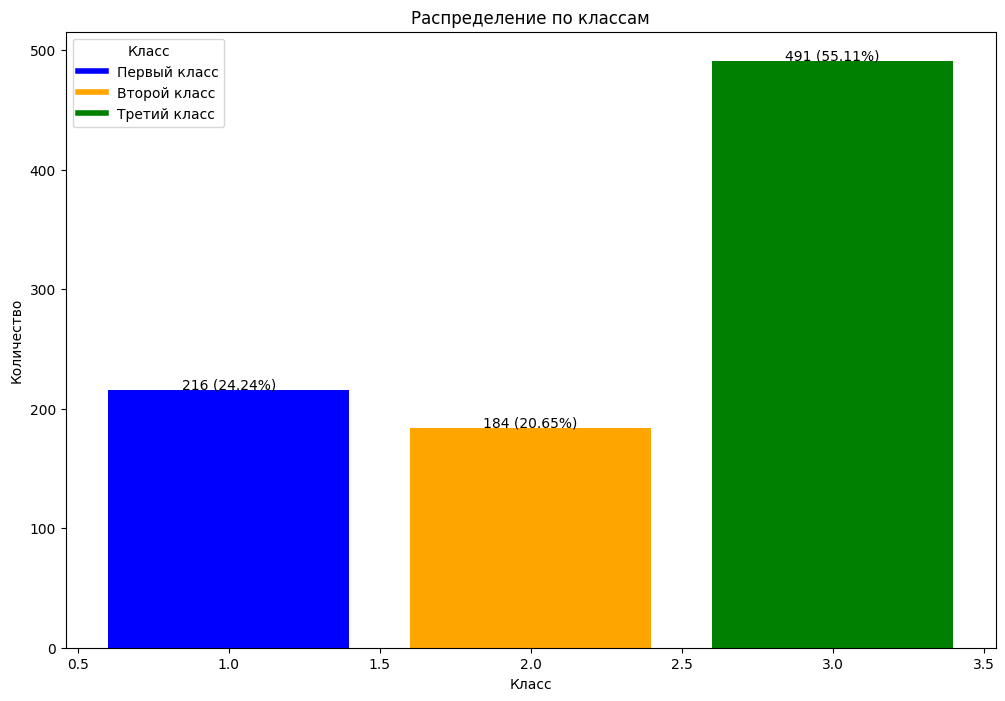

In [481]:
count(train_data, column='Pclass', class_labels={1: 'Первый класс', 2: 'Второй класс', 3: 'Третий класс'}, colors=['blue', 'orange', 'green'], show_legend=True)

In [482]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_survival(data, pclass_column='Pclass', survived_column='Survived'):

    class_counts = data[pclass_column].value_counts().sort_index()

    survived_counts = data[data[survived_column] == 1][pclass_column].value_counts().reindex(class_counts.index, fill_value=0)
    deceased_counts = data[data[survived_column] == 0][pclass_column].value_counts().reindex(class_counts.index, fill_value=0)


    survival_rate = (survived_counts / class_counts) * 100
    deceased_rate = (deceased_counts / class_counts) * 100


    bar_width = 0.35
    index = np.arange(len(class_counts))

    plt.figure(figsize=(12, 8))
    bars1 = plt.bar(index - bar_width / 2, survived_counts, bar_width, label='Выжившие', color='blue')
    bars2 = plt.bar(index + bar_width / 2, deceased_counts, bar_width, label='Погибшие', color='red')

    for i in range(len(index)):
        survived = survived_counts.iloc[i] if i < len(survived_counts) else 0
        deceased = deceased_counts.iloc[i] if i < len(deceased_counts) else 0
        survival_percent = survival_rate.iloc[i] if i < len(survival_rate) else 0
        deceased_percent = deceased_rate.iloc[i] if i < len(deceased_rate) else 0
        plt.text(index[i] - bar_width / 2, survived + 1, f"{survived}\n({survival_percent:.2f}%)", ha='center', color='blue')
        plt.text(index[i] + bar_width / 2, deceased + 1, f"{deceased}\n({deceased_percent:.2f}%)", ha='center', color='red')

    plt.xlabel('Категория')
    plt.ylabel('Количество пассажиров')
    plt.title('Количество выживших и погибших пассажиров по категориям')
    plt.xticks(index, class_counts.index, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

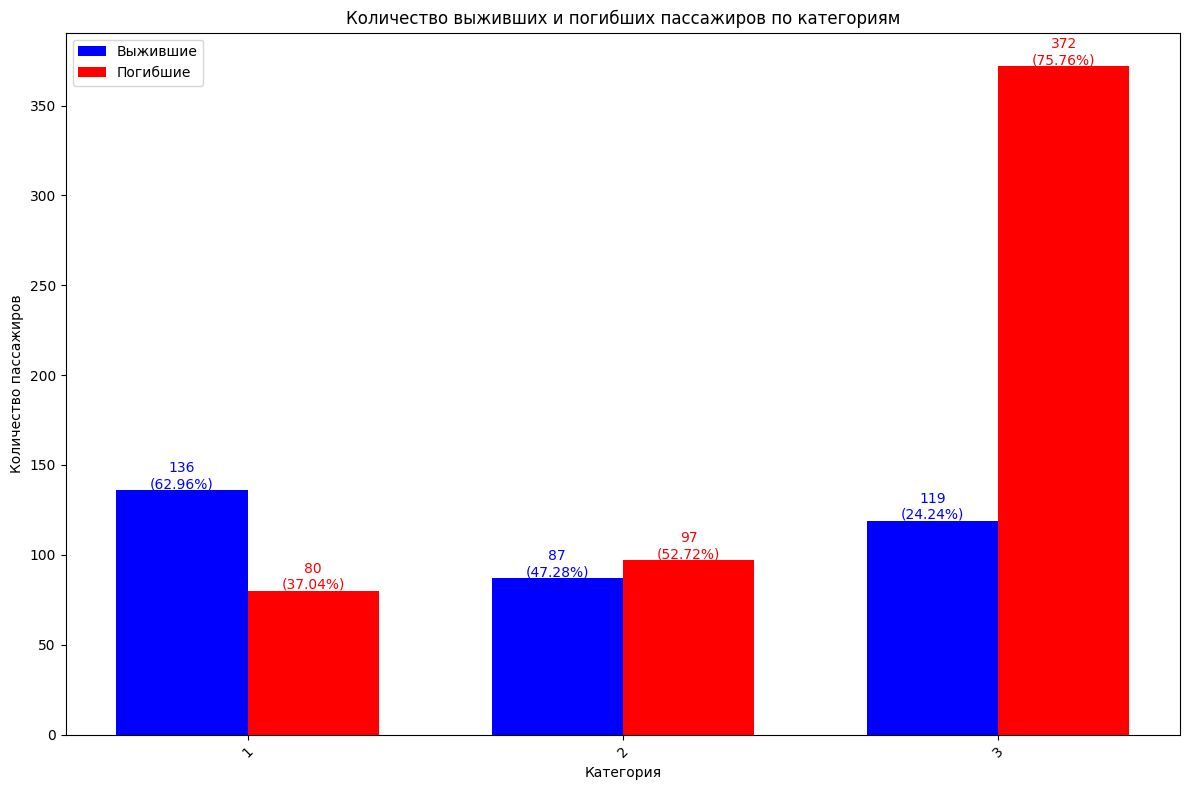

In [483]:
plot_survival(train_data, pclass_column='Pclass', survived_column='Survived')

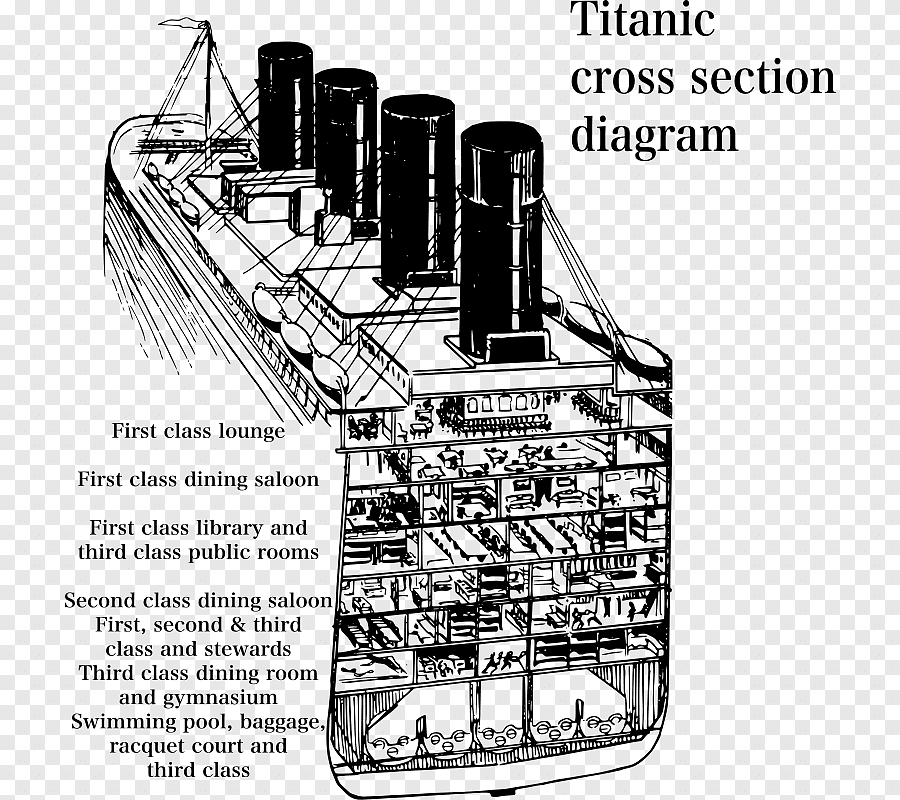

In [484]:
from IPython.display import Image
Image("/content/png-clipart-wiring-diagram-cross-section-cutaway-drawing-rms-titanic-section-text-plan.png")

## Sex

In [485]:
import matplotlib.pyplot as plt

def plot_gender_distribution(data):
    gender_counts = data['Sex'].value_counts()

    gender_percentages = gender_counts / gender_counts.sum() * 100

    labels = ['Мужчины', 'Женщины']
    colors = ['lightseagreen', 'pink']

    grouped_data = data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

    def func(pct, allvals):
        absolute = int(round(pct / 100.*sum(allvals)))
        return f"{absolute} ({pct:.1f}%)"

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    pie_values = gender_counts
    ax[0].pie(pie_values, labels=labels, autopct=lambda pct: func(pct, pie_values), colors=colors, startangle=140)
    ax[0].set_title('Распределение пассажиров по полу')

    bar_width = 0.35
    index = grouped_data.index
    bars1 = ax[1].bar(index - bar_width / 2, grouped_data[1], bar_width, label='Выжившие', color='blue')
    bars2 = ax[1].bar(index + bar_width / 2, grouped_data[0], bar_width, label='Погибшие', color='red')

    total = grouped_data.sum(axis=1)
    survival_rate = (grouped_data[1] / total) * 100
    deceased_rate = (grouped_data[0] / total) * 100

    for i, (survived, deceased) in enumerate(zip(grouped_data[1], grouped_data[0])):
        ax[1].text(index[i] - bar_width / 2, survived + 10, f"{survived}\n({survival_rate[i]:.2f}%)", ha='center', color='blue')
        ax[1].text(index[i] + bar_width / 2, deceased + 10, f"{deceased}\n({deceased_rate[i]:.2f}%)", ha='center', color='red')

    ax[1].set_xlabel('Пол пассажира')
    ax[1].set_ylabel('Количество пассажиров')
    ax[1].set_title('Количество выживших и погибших пассажиров по полу')
    ax[1].set_xticks(index)
    ax[1].set_xticklabels(['Мужчины', 'Женщины'])
    ax[1].legend()

    plt.tight_layout()
    plt.show()

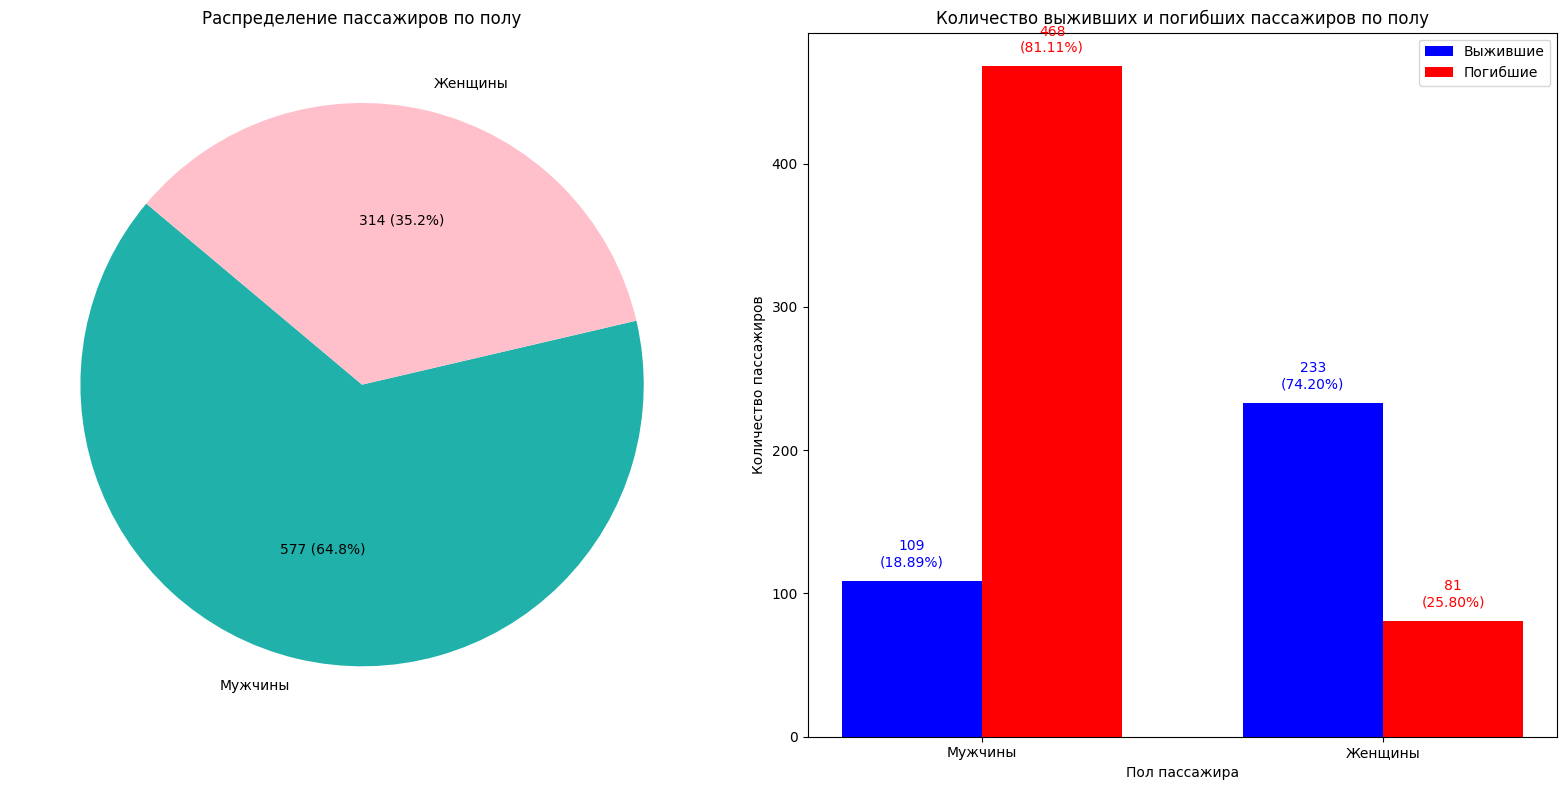

In [486]:
plot_gender_distribution(train_data)

## SibSp

In [487]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_distribution(data, value_column='AgeGroup', bar_color='skyblue', kde_color='green',
                            mean_line_color='red', kde_bw_adjust=0.5, xlim=None):

    value_counts = data[value_column].value_counts().sort_index()

    if xlim is None:
        xlim = (0, len(value_counts) - 1)

    # Создаем графики
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Столбчатая диаграмма
    bars = ax[0].bar(value_counts.index, value_counts.values, color=bar_color)
    ax[0].set_xlabel(value_column)
    ax[0].set_ylabel('Количество')
    ax[0].set_title(f'Распределение по {value_column}')

    total_count = value_counts.sum()
    for bar in bars:
        x = bar.get_x() + bar.get_width() / 2
        count = bar.get_height()
        percentage = (count / total_count * 100).round(2)
        ax[0].text(x, count + 1, f"{int(count)} ({percentage:.2f}%)", ha='center')

    ax[0].set_xticks(range(len(value_counts)))
    ax[0].set_xticklabels(value_counts.index, rotation=45, ha='right')

    sns.kdeplot(data[value_column].astype('category').cat.codes, ax=ax[1], fill=True, color=kde_color,
                bw_adjust=kde_bw_adjust, linestyle='--', linewidth=2)

    mean_value = data[value_column].astype('category').cat.codes.mean()
    ax[1].axvline(mean_value, color=mean_line_color, linestyle='--', linewidth=1.5, label=f'Среднее: {mean_value:.2f}')
    ax[1].legend()

    ax[1].set_xlim(xlim)
    ax[1].set_xlabel(value_column)
    ax[1].set_ylabel('Плотность')
    ax[1].set_title(f'График плотности (Density plot) для {value_column}')

    plt.tight_layout()
    plt.show()

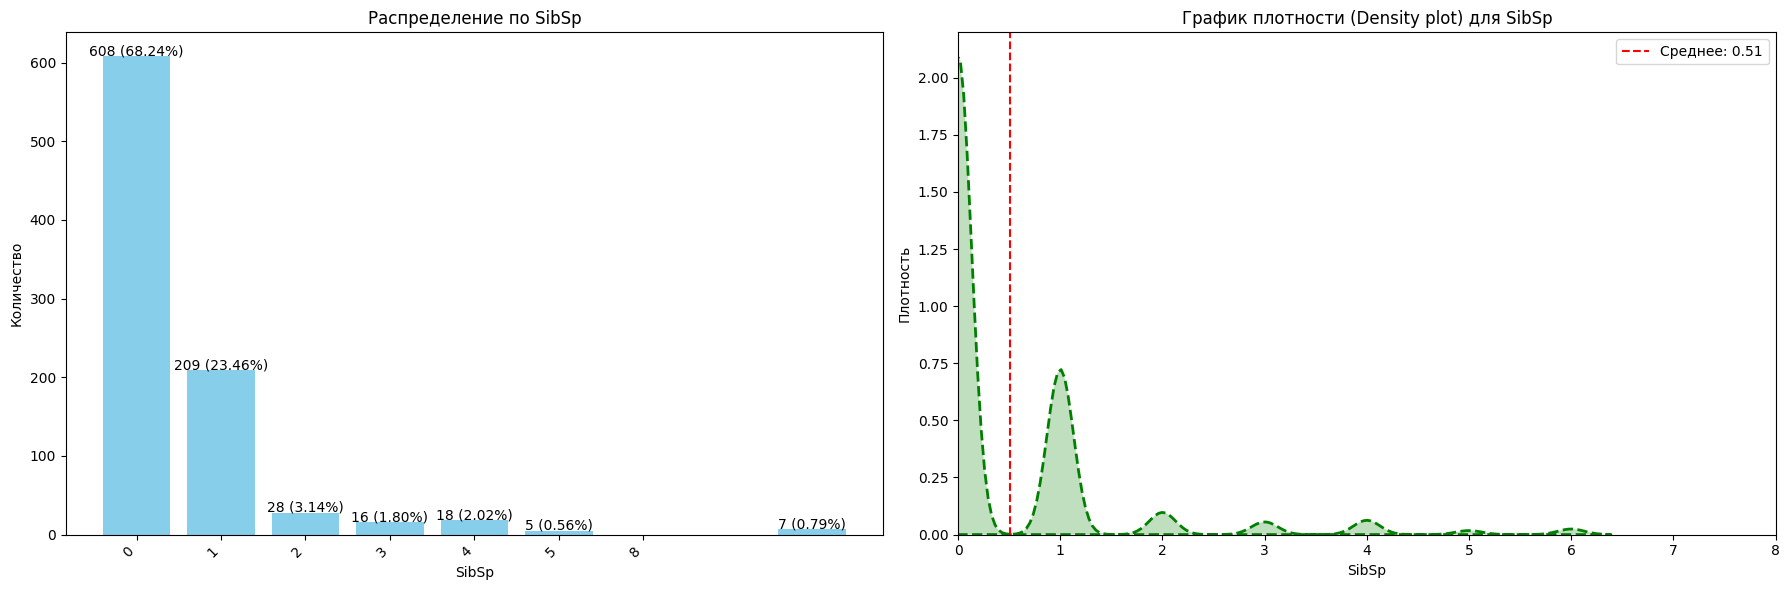

In [488]:
plot_density_distribution(train_data, value_column='SibSp', bar_color='skyblue', kde_color='green', mean_line_color='red', kde_bw_adjust=0.5, xlim=(0, 8))

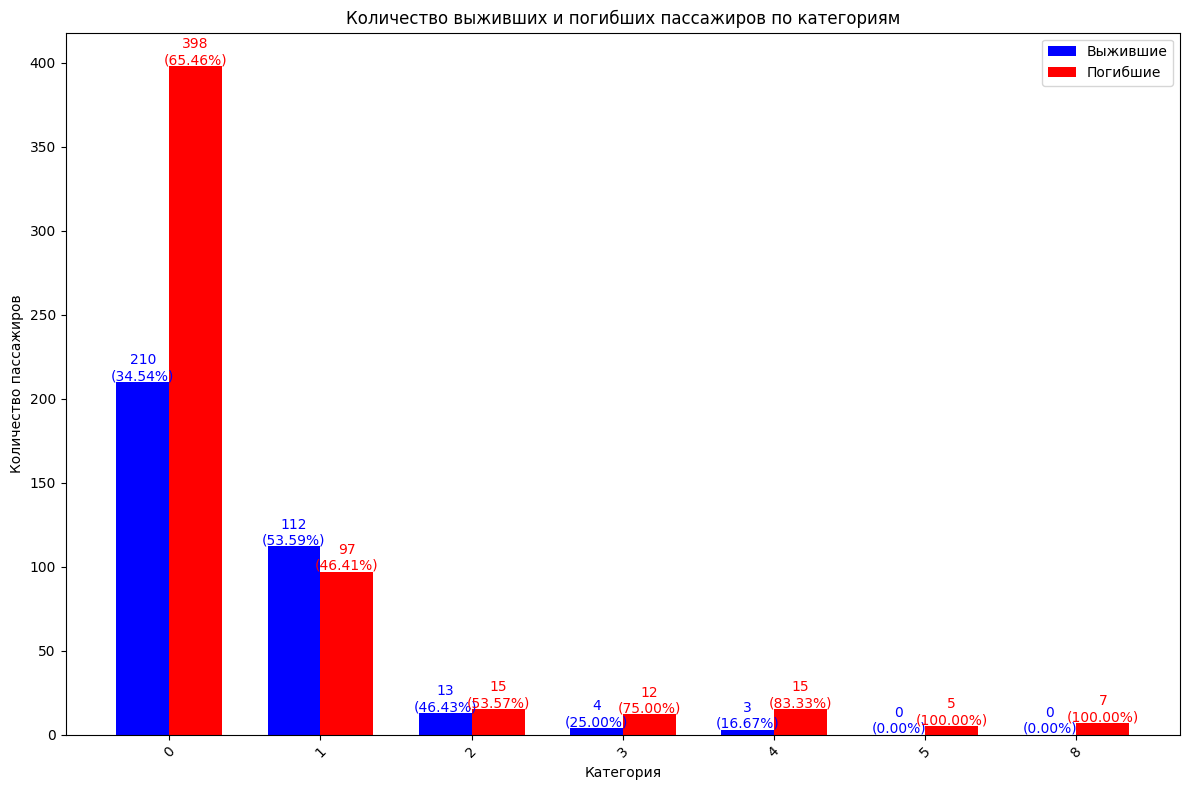

In [489]:
plot_survival(train_data, pclass_column='SibSp', survived_column='Survived')

## Parch

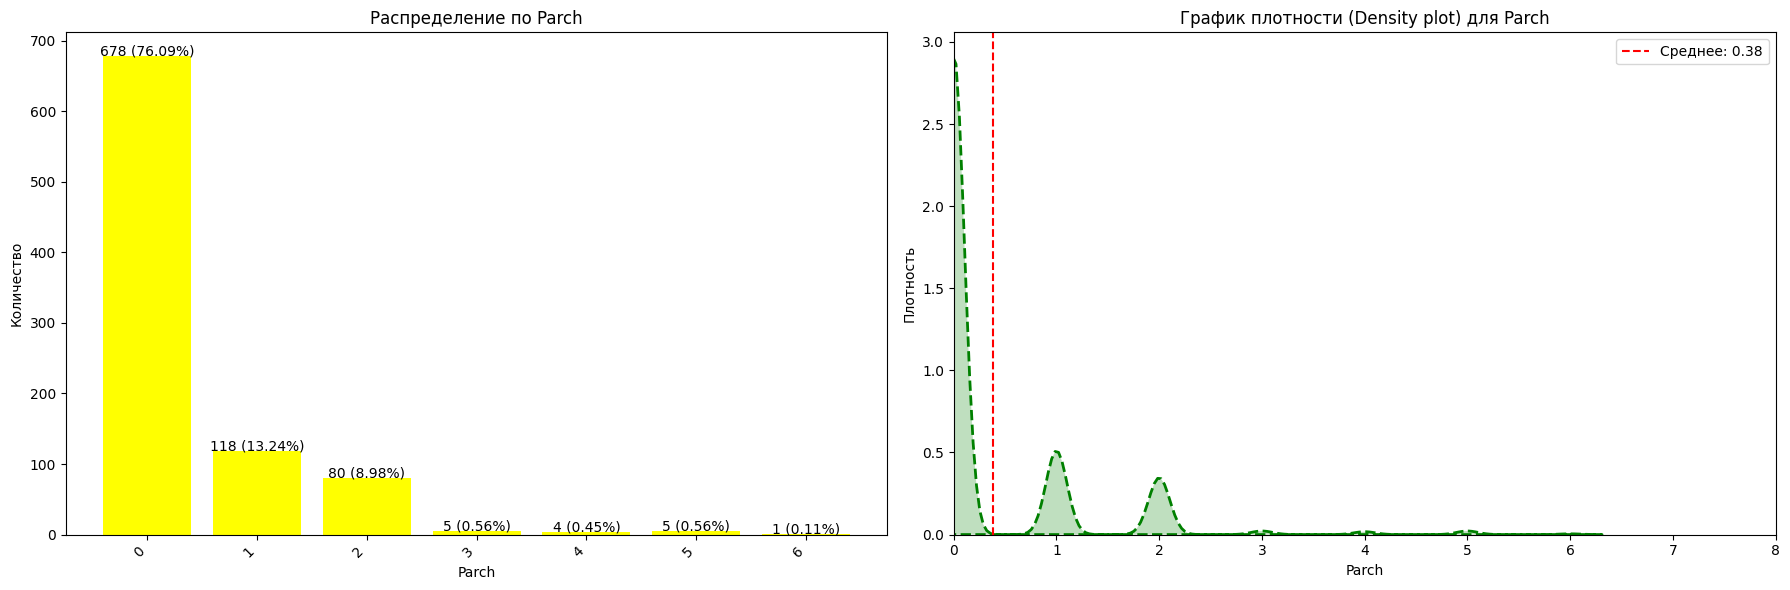

In [490]:
plot_density_distribution(train_data, value_column='Parch', bar_color='yellow', kde_color='green', mean_line_color='red', kde_bw_adjust=0.5, xlim=(0, 8))

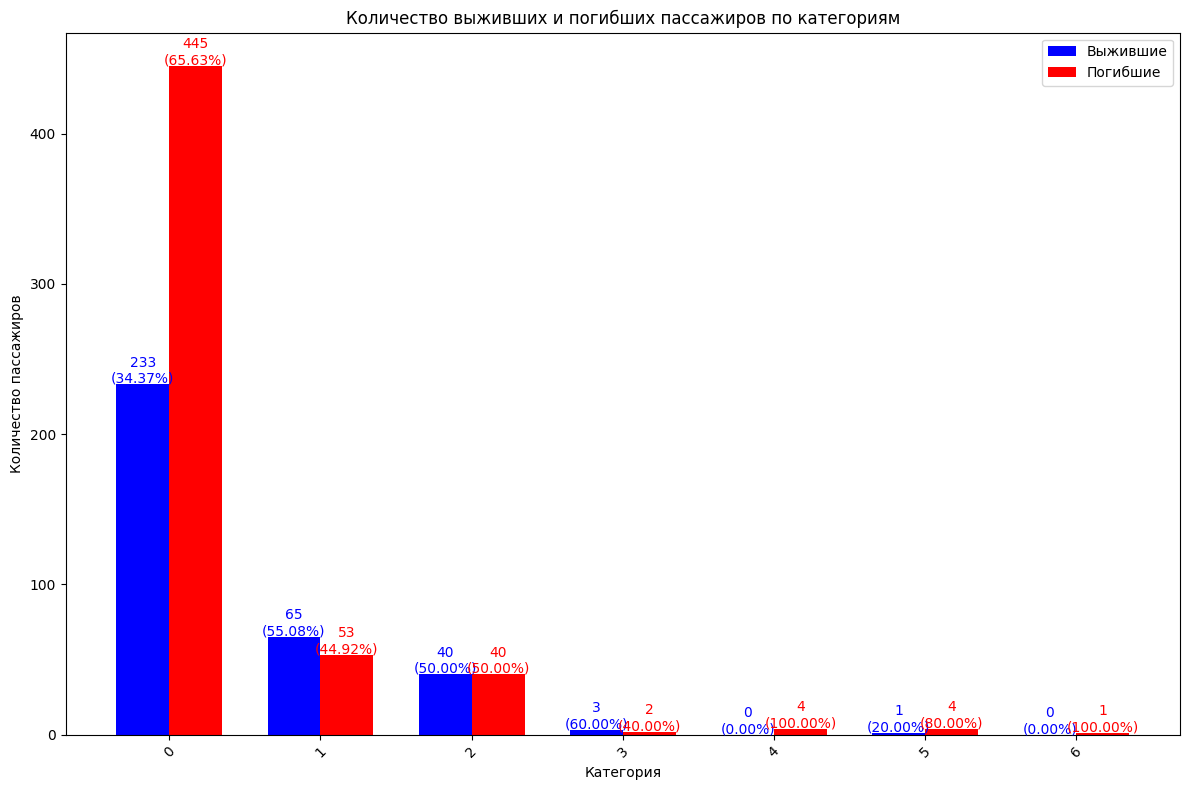

In [491]:
plot_survival(train_data, pclass_column='Parch', survived_column='Survived')

## Age

In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Определение возрастных групп
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

# Подсчет количества пассажиров в каждой возрастной группе
age_group_counts = train_data['AgeGroup'].value_counts().sort_index()

# Вычисление процентного соотношения
age_group_percentages = (age_group_counts / age_group_counts.sum() * 100).round(2)

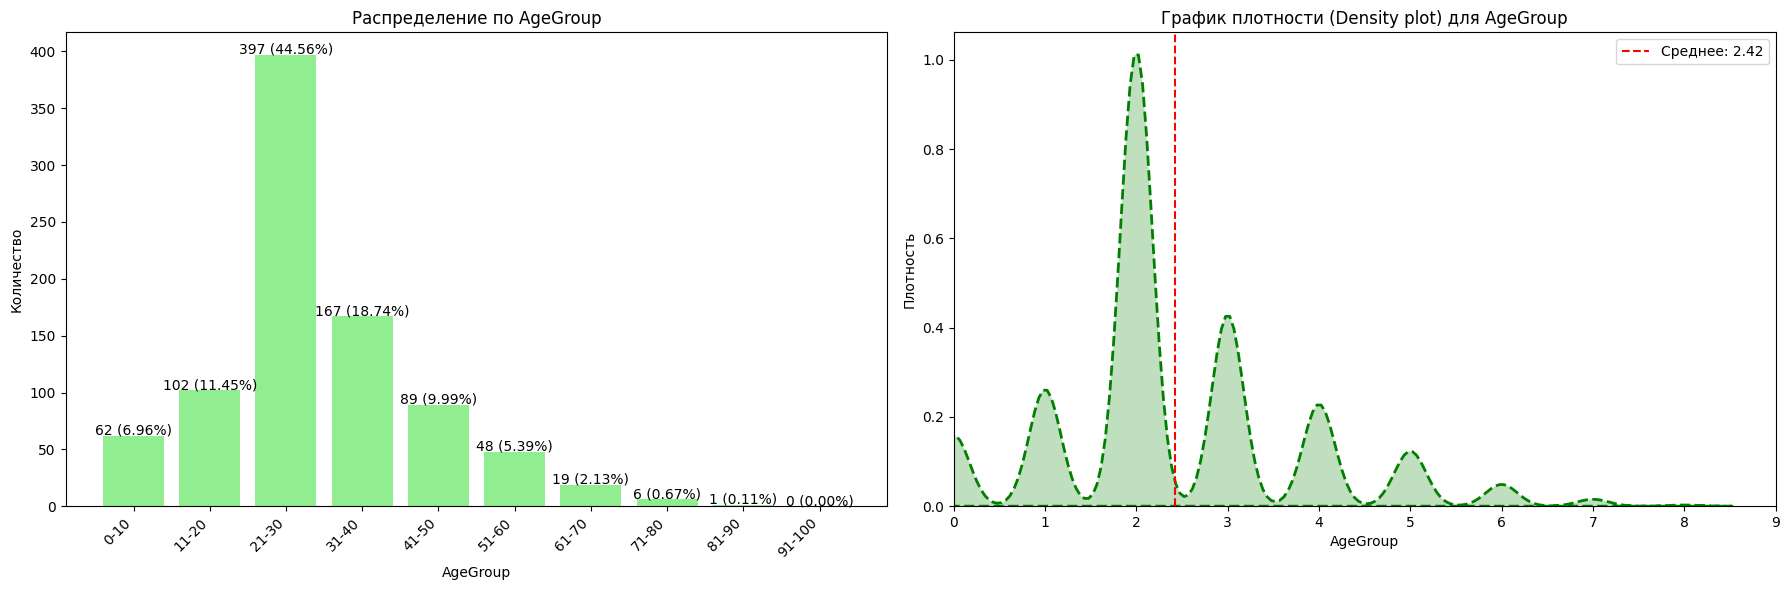

In [493]:
plot_density_distribution(train_data, value_column='AgeGroup', bar_color='lightgreen', kde_color='green', mean_line_color='red', kde_bw_adjust=0.5)

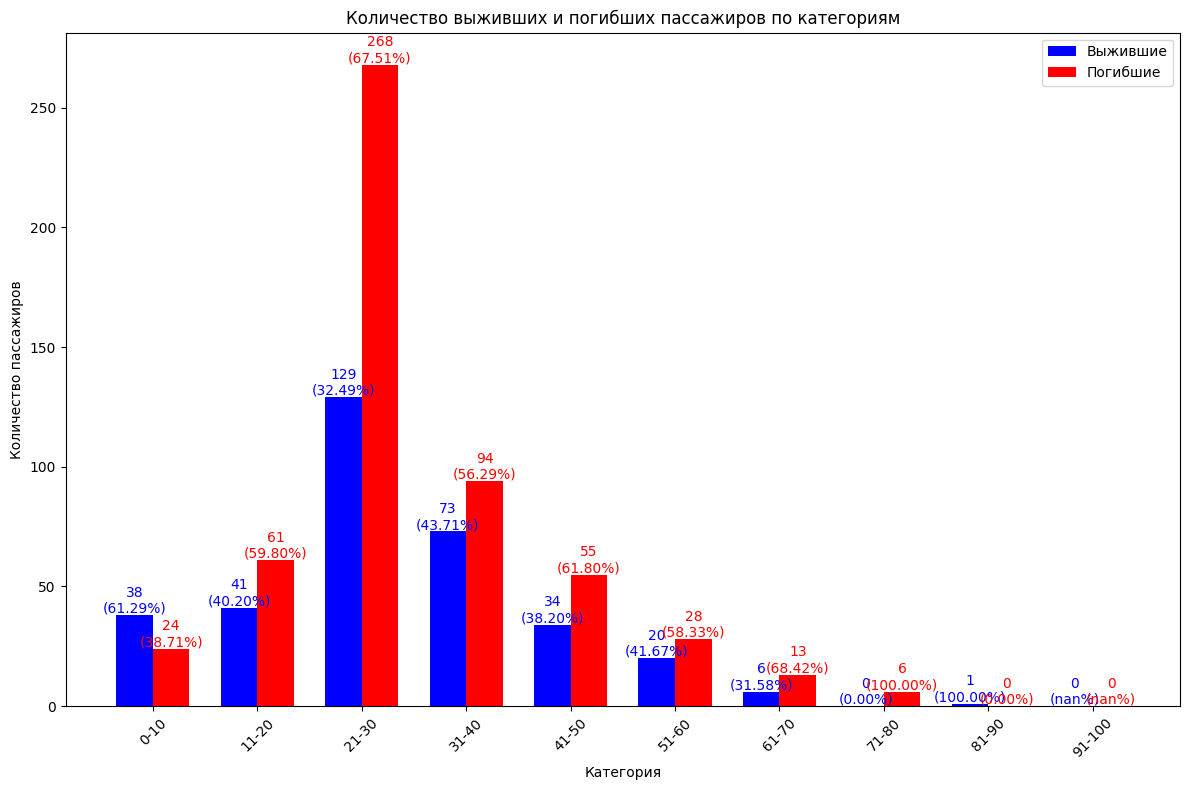

In [494]:
plot_survival(train_data, pclass_column='AgeGroup', survived_column='Survived')

## Embarked

<ipython-input-480-7c931df23b71>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = class_counts[idx]
<ipython-input-480-7c931df23b71>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = class_percentages[idx]


Класс C: 168 (18.86%)
Класс Q: 77 (8.64%)
Класс S: 646 (72.50%)


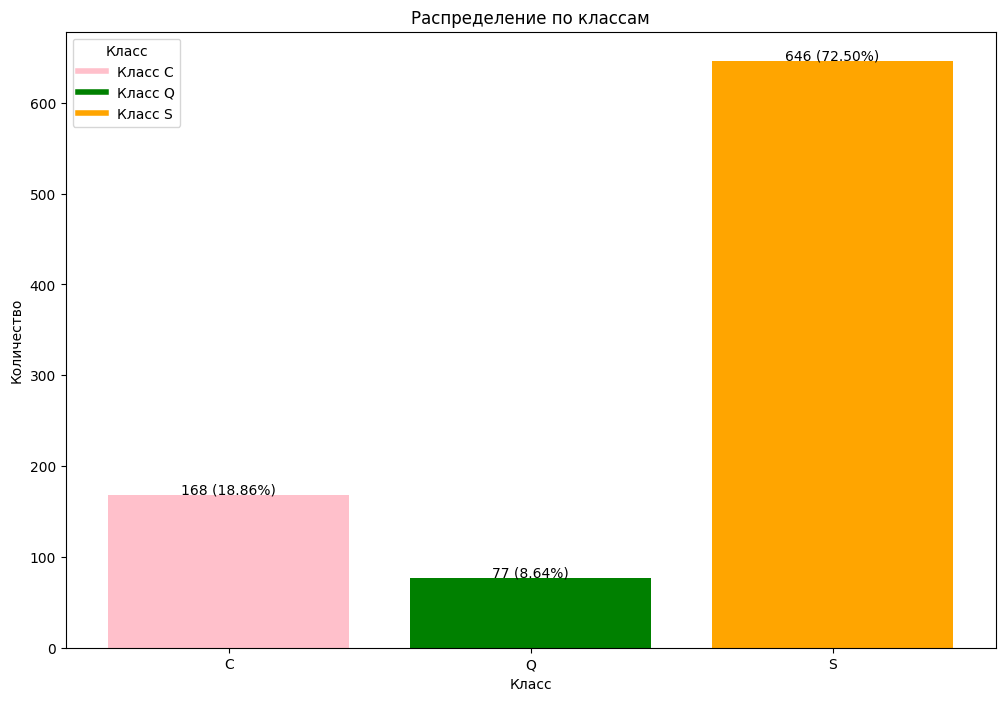

In [495]:
count(train_data, column='Embarked', class_labels={1: 'S', 2: 'C', 3: 'Q'}, colors=['pink', 'green', 'orange'], show_legend=True)

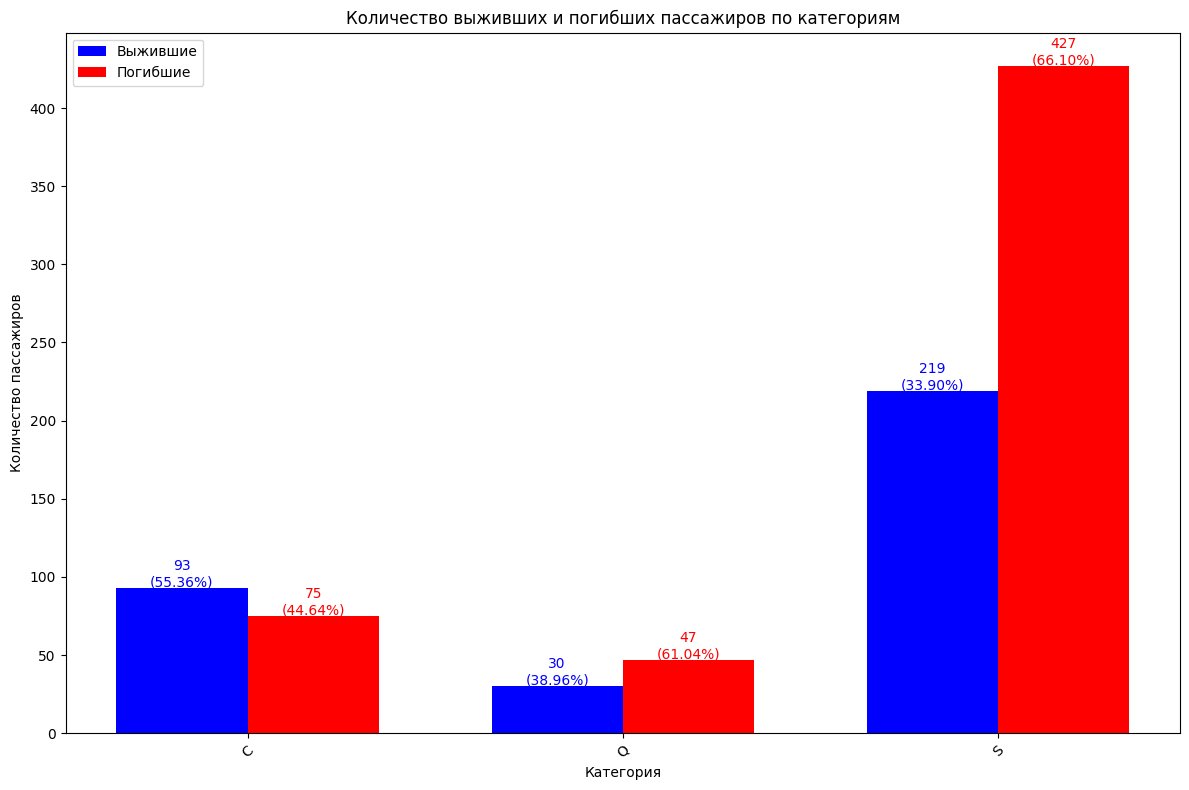

In [496]:
plot_survival(train_data, pclass_column='Embarked', survived_column='Survived')

### Cities

Southampton (S):
Саутгемптон был важным портовым городом в Англии, известным своим значительным морским торговым оборотом. Он был экономически развитым и считался важным центром для эмигрантов и торговцев. Хотя сам город не был особенно богатым, его значимость как порта делала его экономически важным.

Cherbourg (C):
Шербур во Франции был развитым портовым городом, особенно важным для военного и коммерческого флота. Порт в Шербуре был современным и хорошо оборудованным, и город в целом имел значительную стратегическую важность. Он был тесно связан с Парижем, что делало его привлекательным для более состоятельных пассажиров.

Queenstown (Q) (ныне известен как Ков):
Куинстаун в Ирландии был портом, который использовался в основном эмигрантами, покидающими Европу в поисках лучшей жизни в Америке. Город не был особенно богатым, и многие пассажиры, садившиеся на "Титаник" в Куинстауне, принадлежали к бедным или среднему классу. Этот порт был менее развитым и более сельским по сравнению с Саутгемптоном и Шербуром.

Итог:

Более богатые города: Шербур (C).
Менее богатые/бедные города: Саутгемптон (S) и Куинстаун (Q).

## Fare

In [497]:
import pandas as pd
import matplotlib.pyplot as plt

train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

bins = [0, 10, 50, 100, 500]
labels = ['Low', 'Medium', 'High', 'Very High']

train_data['Fare_Category'] = pd.cut(train_data['Fare'], bins=bins, labels=labels, include_lowest=True)

fare_category_counts = train_data['Fare_Category'].value_counts().sort_index()

fare_category_percentages = (fare_category_counts / fare_category_counts.sum() * 100).round(2)

def plot_fare_distribution(counts, percentages):
    plt.figure(figsize=(10, 6))
    ax = counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red'], ax=plt.gca())
    plt.title('Количество билетов по категориям стоимости')
    plt.xlabel('Категории стоимости')
    plt.ylabel('Количество билетов')
    plt.xticks(rotation=0)

    for i, p in enumerate(ax.patches):
        height = p.get_height()
        percentage = percentages[i]
        ax.annotate(f'{int(height)} ({percentage:.2f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points')

    plt.figtext(0.99, 0.01,
                'Диапазоны стоимости:\n'
                '0-10: Low\n'
                '10-50: Medium\n'
                '50-100: High\n'
                '100-500: Very High',
                horizontalalignment='left',
                verticalalignment='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.show()

<ipython-input-497-f9cf364f9a18>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentages[i]


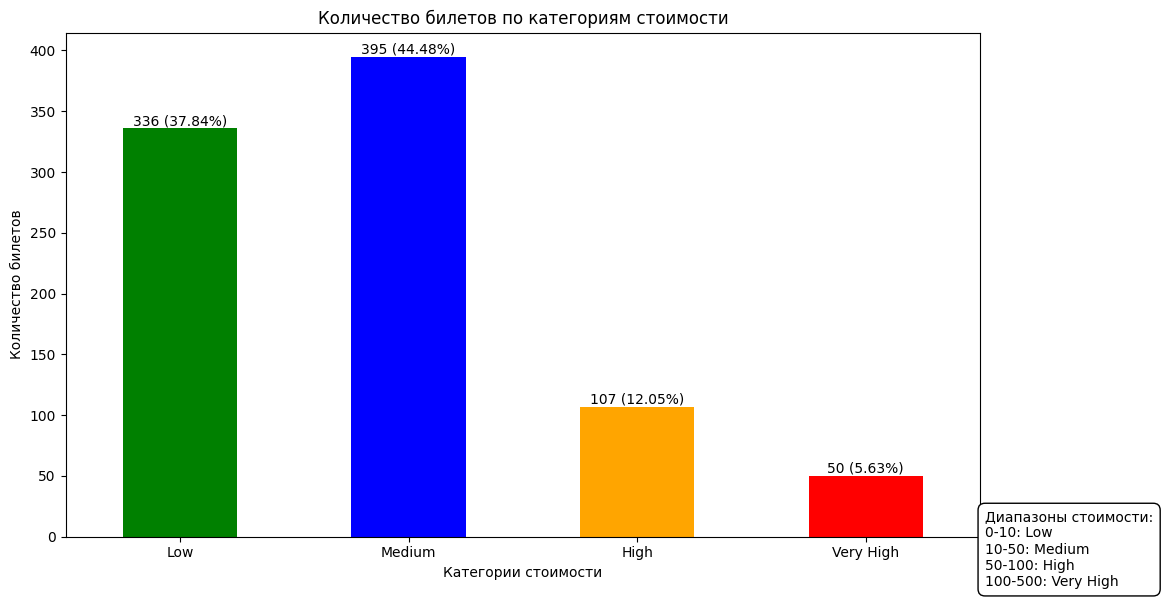

In [498]:
plot_fare_distribution(fare_category_counts, fare_category_percentages)

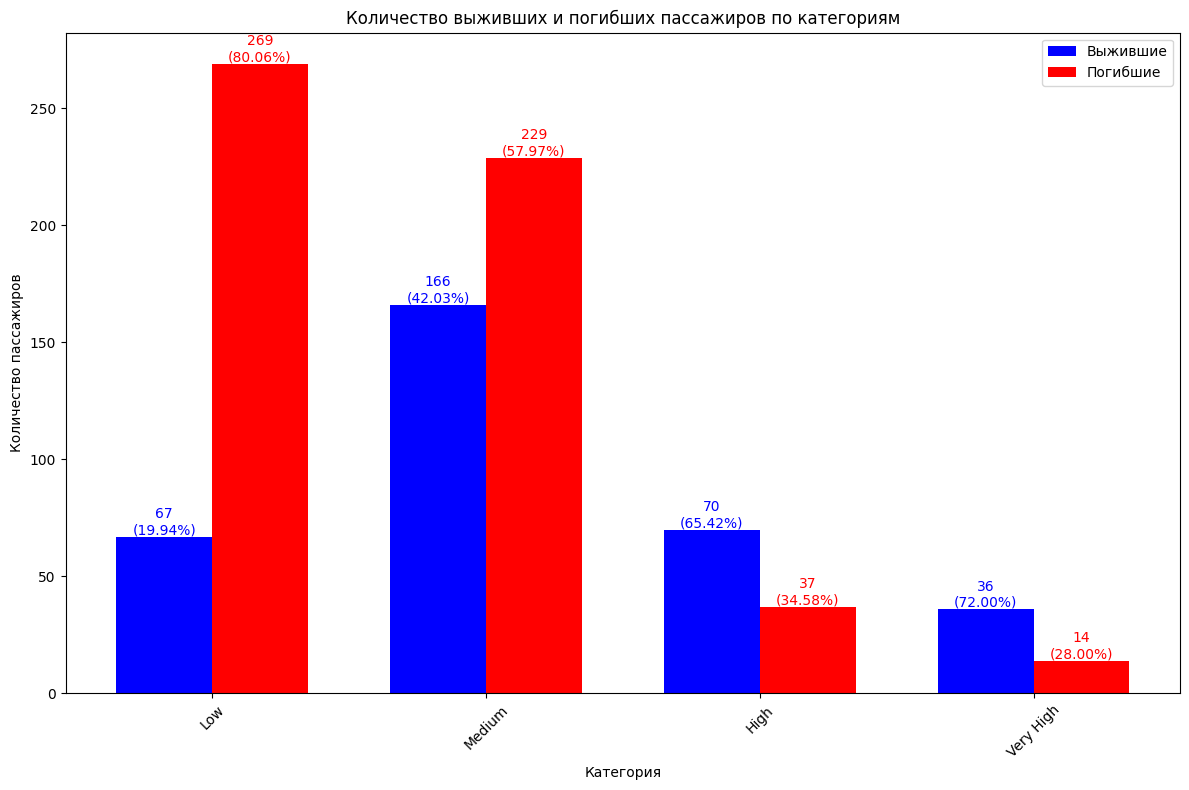

In [499]:
plot_survival(train_data, pclass_column='Fare_Category', survived_column='Survived')

## Conclusion

Pclass

* Выжило больше всего пассажиров 1 класса (62%)

* Во 2 классе выжило (47%) пассажиров

* В третьем классе выжило (24%)

Sex

* Шанс выживаемости у женщин составляет (74%),
* Тогда как у мужчин (18%)

SibSp

* Смертность людей без братьев и сестер могла быть вызвана отсуствием помощи (34%) выживаемость
* Люди с 1 брата или сестры выживали с вероятностью (53%)  могло быть вызвано поддержкой родственников
* Люди с 2 братьями и сестрами выживали с вероятностью (46%)
* Люди с более чем 3 братьями или сестрами выживали с меньшей вероятностью, может быть вызвана более трудной ситуацией с эвакуацией всех членов семьи (>=25% и меньше)

Parch

* Люди без детей и родителей выжили в (34%) случаев, может указывать на отсуствие помощи
* Люди с 1 детей/родителей выживали в (55%) случаях, может быть вызвано помощью в эвакуации со стороны семьи
* Люди с 2 и 3 детьми/родителями выживали в (50% и 60%) соотвественно случаях может быть вызвано помощью в эвакуации со стороны семьи
* Люди с 5 детьми/родителями выживали всего в (20%), может быть вызвано сложностями эвакуации с большим количеством людей
* Люди с 4 и 6 детьми/родителями не выжили, так же причина сложность эвакуации  

Age

* 0-10 имеют наивысшую выживаемость (61%)
* 11-20 имеют среднюю выживаемость около (43%)
* 21-30 имеют низкую выживаемость в (41%)
* 31-40 имели выживаемость около (40%)
* 41-50 имели выживаемость около (38%)
* 51-60 имели выживаемость около (32%)
* 61-70 выживаемость около (31%)
* 71-100 мало входных данных

Embarked

* Люди с порта C имеют набольший процент выживаемости среди остальных пассажиров (55%)
* Плохие показатели выживаемости показали люди с портов Q (38%) и S (33%)

Fare

* Здесь явный показатель что чем дороже билет тем, больше процент выживаемости
* те кто купили дешевые билеты (до 10 у.е.) **выживут** с вероятностью в (19%)
* те кто купили билеты средней цены (10 до 50 у.е.) **выживут** с вероятностью (42%)

* те кто купил билеты высокой цены (от 50 до 100 у.е.) **выживут** с вероятностью (65%)
* те кто купил самые дорогие билеты (от 100 до 500 у.е.) **выживут** с вероятностью (72%)

#Multifactorial EDA

## EDA

### Pclass and Age

In [500]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(data, index_column, columns_column, values_column,
                 cmap='YlGnBu', figsize=(14, 7), cbar_label='Percentage',
                 title='Процентное соотношение', xlabel=None, ylabel=None, order=None):

    pivot_table = data.pivot_table(index=index_column, columns=columns_column, values=values_column, aggfunc='count')

    if order is None:
        order = sorted(pivot_table.index, key=lambda x: (int(x.split('-')[0]), float('inf') if '-' not in x else int(x.split('-')[1])))

    pivot_table = pivot_table.loc[order]

    pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table_percentage, annot=True, fmt='.2f', cmap=cmap, cbar_kws={'label': cbar_label})
    plt.title(title)
    plt.xlabel(xlabel if xlabel else columns_column)
    plt.ylabel(ylabel if ylabel else index_column)

    plt.gca().invert_yaxis()

    plt.show()

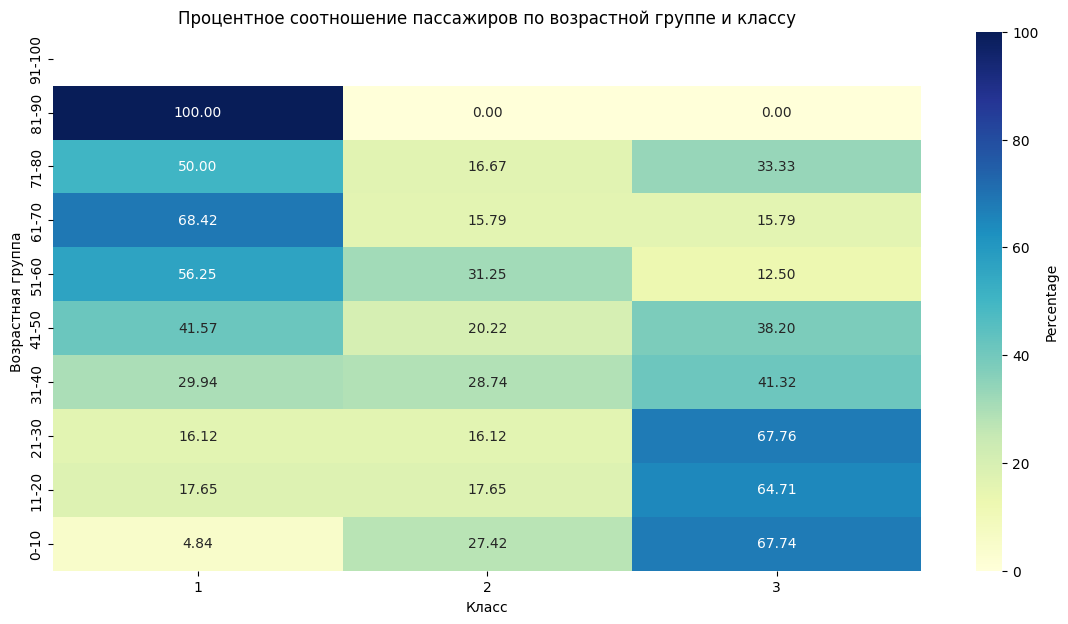

In [501]:
plot_heatmap(train_data, index_column='AgeGroup', columns_column='Pclass', values_column='PassengerId',
             title='Процентное соотношение пассажиров по возрастной группе и классу',
             xlabel='Класс', ylabel='Возрастная группа')

In [502]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_survival_percentage_heatmap(data, survival_column, age_column, parent_column,
                                     cmap='YlGnBu', figsize=(14, 7), title='Процентное соотношение выживших',
                                     xlabel='Количество родителей/детей', ylabel='Возрастная группа'):

    survived_data = data[data[survival_column] == 1]

    grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)

    percentage_data = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).fillna(0)

    age_groups_order = sorted(percentage_data.index, key=lambda x: (int(x.split('-')[0]), float('inf') if '-' not in x else int(x.split('-')[1])))

    percentage_data = percentage_data.loc[age_groups_order]

    plt.figure(figsize=figsize)
    sns.heatmap(percentage_data, annot=True, fmt=".2f", cmap=cmap, cbar=True, linewidths=.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

<ipython-input-502-dcd1c8db1072>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)


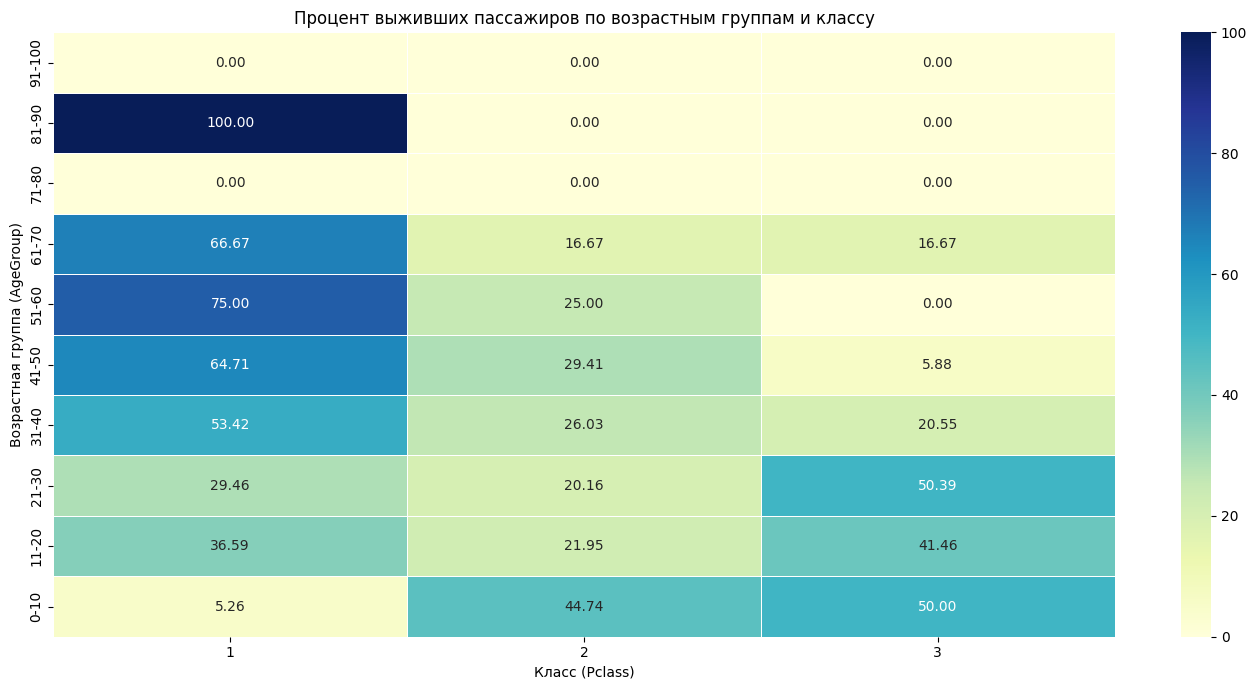

In [503]:
plot_survival_percentage_heatmap(
    data=train_data,
    survival_column='Survived',
    age_column='AgeGroup',
    parent_column='Pclass',
    title='Процент выживших пассажиров по возрастным группам и классу',
    xlabel='Класс (Pclass)',
    ylabel='Возрастная группа (AgeGroup)'
)


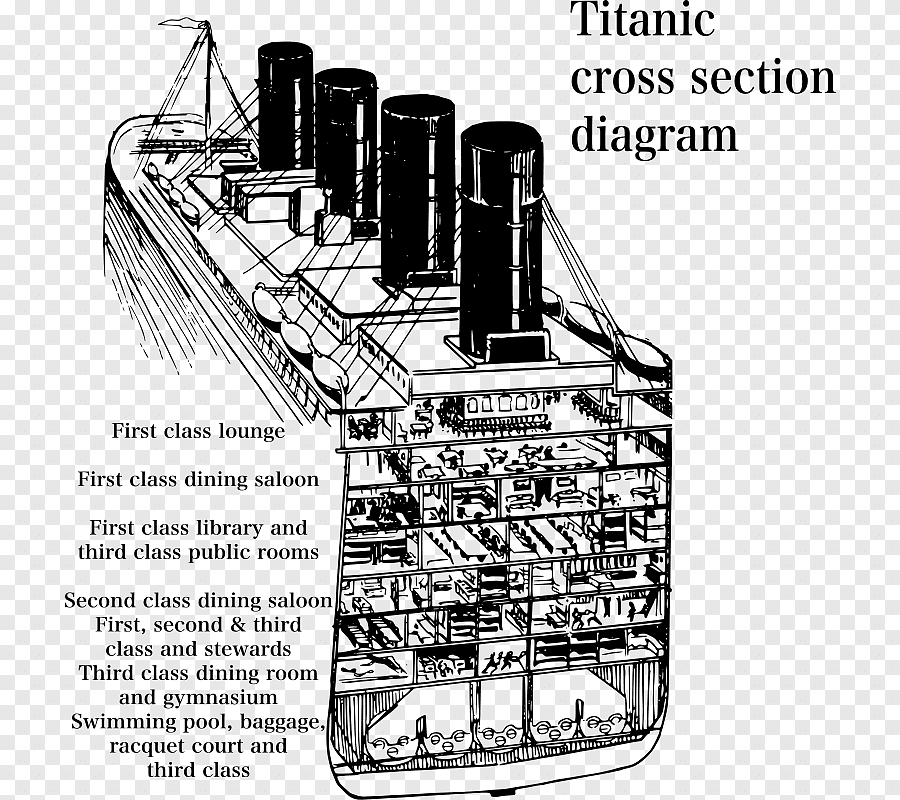

In [504]:
from IPython.display import Image
Image("/content/png-clipart-wiring-diagram-cross-section-cutaway-drawing-rms-titanic-section-text-plan.png")

### Parch and Age

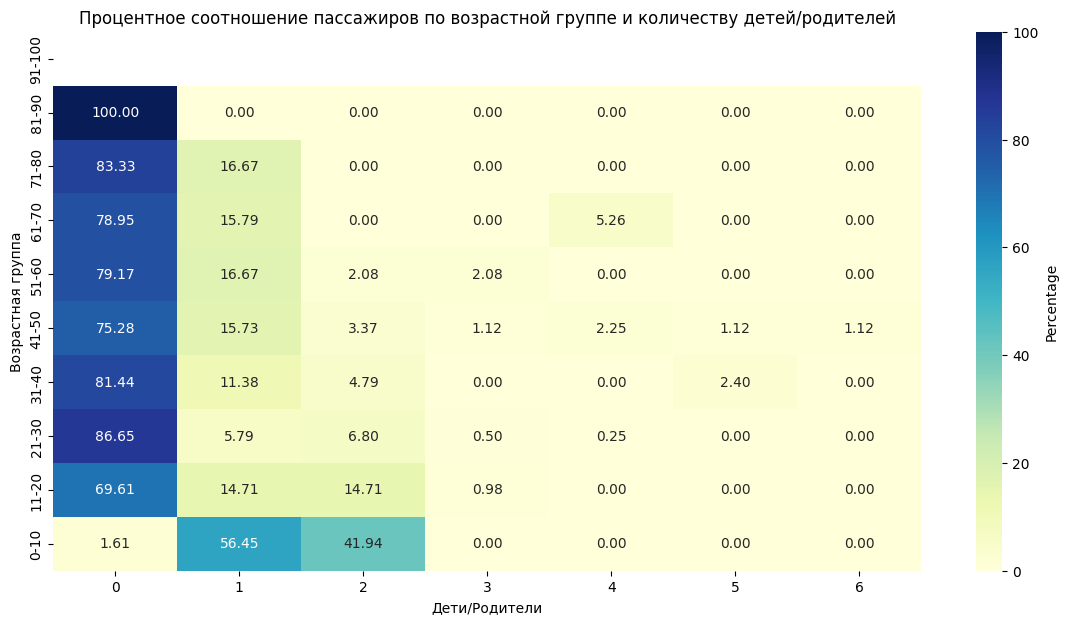

In [505]:
plot_heatmap(train_data, index_column='AgeGroup', columns_column='Parch', values_column='PassengerId',
             title='Процентное соотношение пассажиров по возрастной группе и количеству детей/родителей',
             xlabel='Дети/Родители', ylabel='Возрастная группа')

<ipython-input-502-dcd1c8db1072>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)


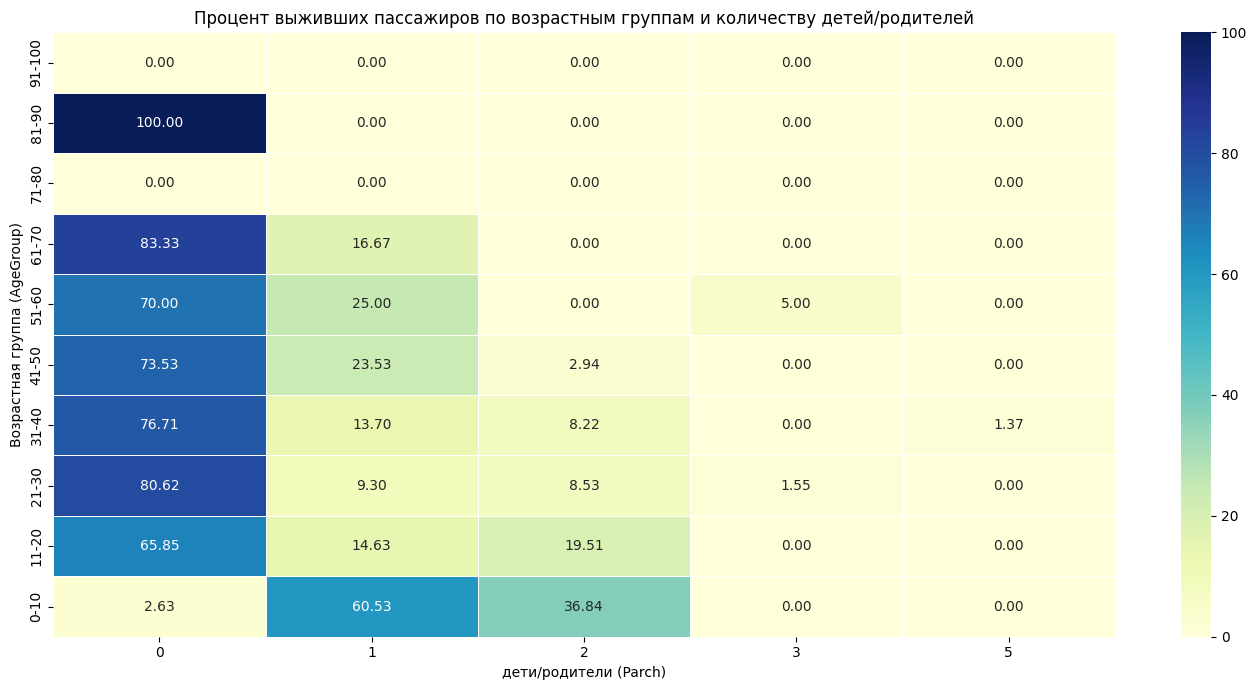

In [506]:
plot_survival_percentage_heatmap(
    data=train_data,
    survival_column='Survived',
    age_column='AgeGroup',
    parent_column='Parch',
    title='Процент выживших пассажиров по возрастным группам и количеству детей/родителей',
    xlabel='дети/родители (Parch)',
    ylabel='Возрастная группа (AgeGroup)'
)


### Sex and Age

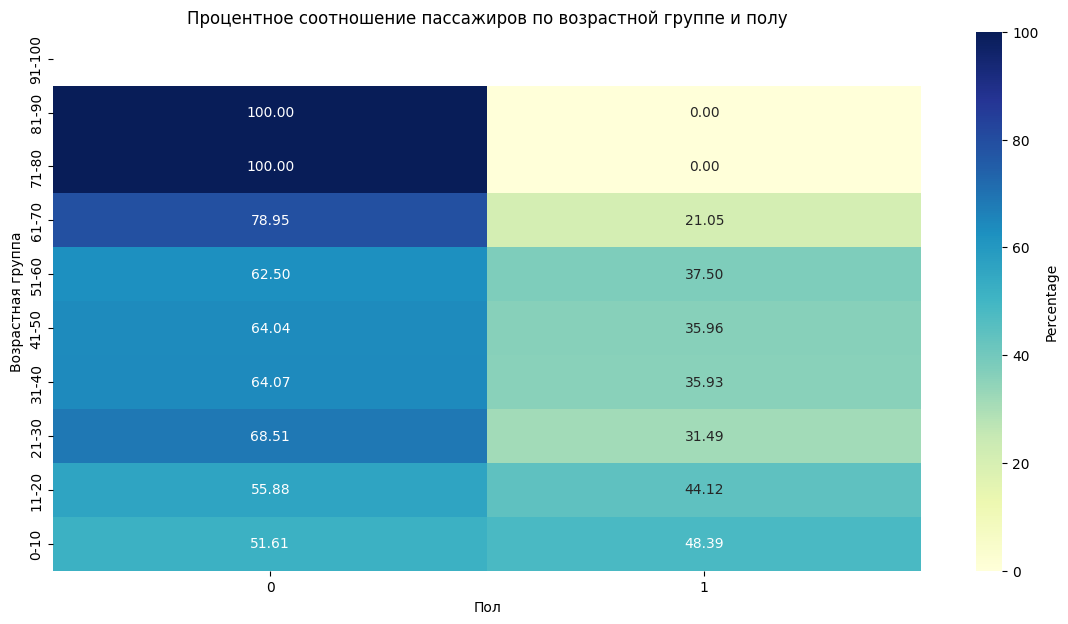

In [507]:
plot_heatmap(train_data, index_column='AgeGroup', columns_column='Sex', values_column='PassengerId',
             title='Процентное соотношение пассажиров по возрастной группе и полу',
             xlabel='Пол', ylabel='Возрастная группа',)

<ipython-input-502-dcd1c8db1072>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)


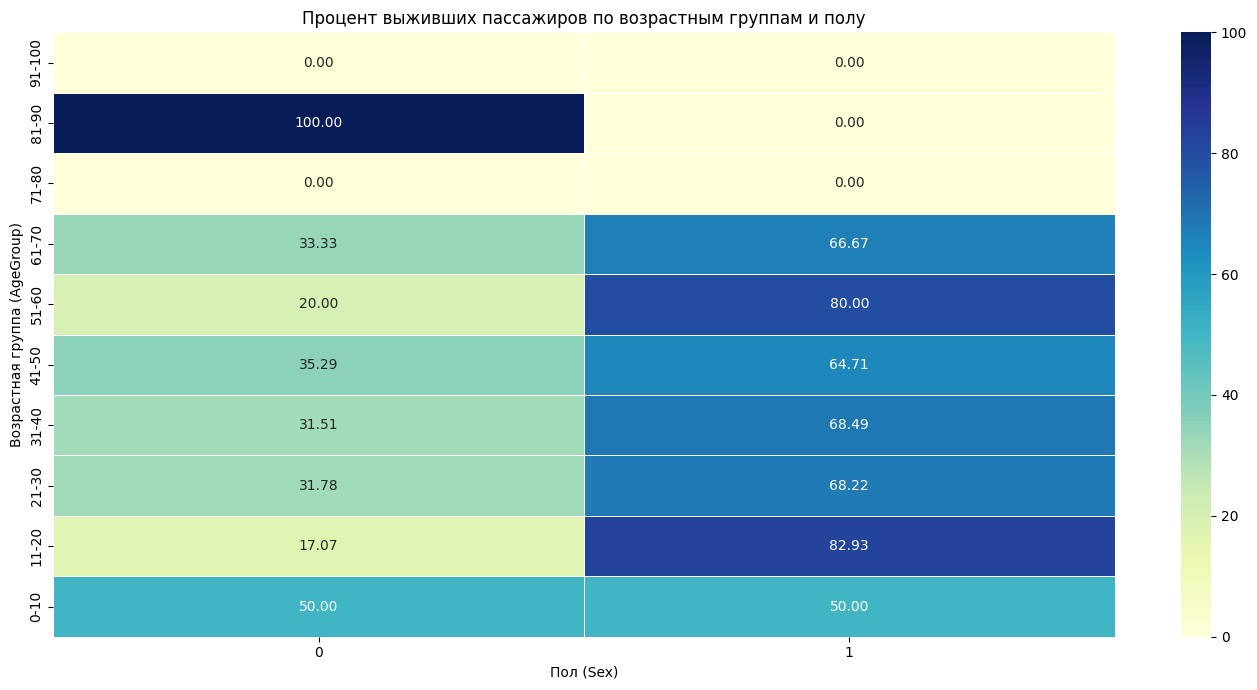

In [508]:
plot_survival_percentage_heatmap(
    data=train_data,
    survival_column='Survived',
    age_column='AgeGroup',
    parent_column='Sex',
    title='Процент выживших пассажиров по возрастным группам и полу',
    xlabel='Пол (Sex)',
    ylabel='Возрастная группа (AgeGroup)'
)


### Embarked and Age

<ipython-input-502-dcd1c8db1072>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)


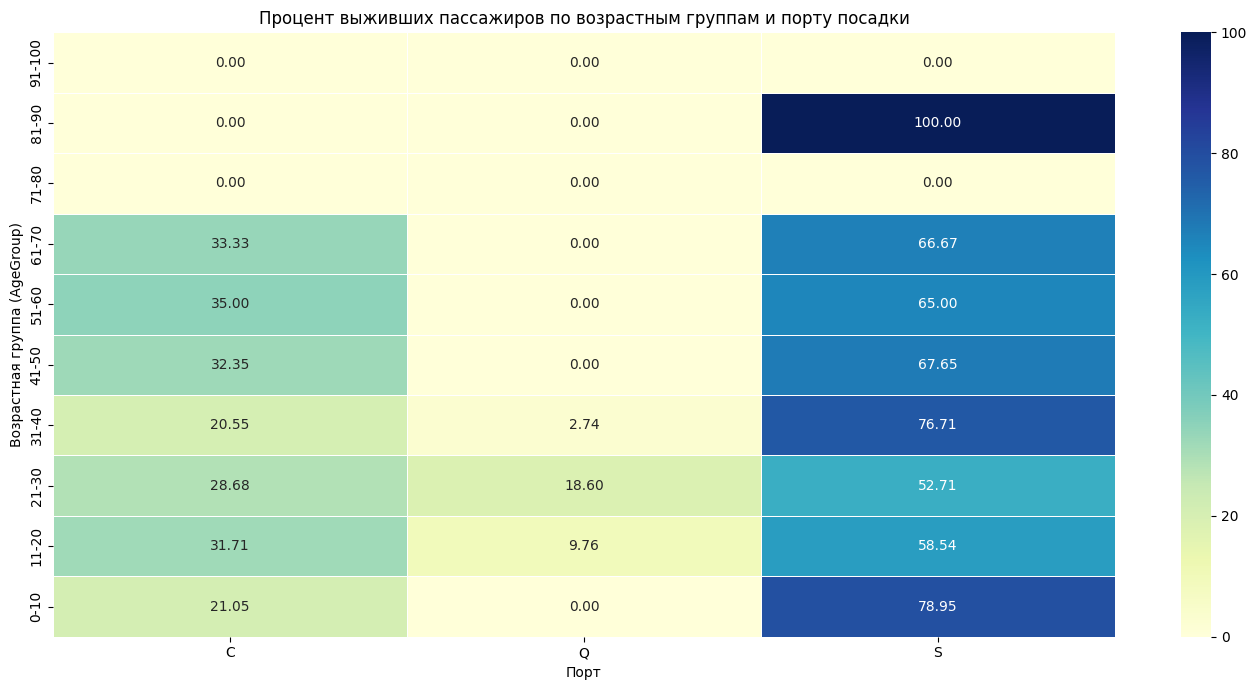

In [509]:
plot_survival_percentage_heatmap(
    data=train_data,
    survival_column='Survived',
    age_column='AgeGroup',
    parent_column='Embarked',
    title='Процент выживших пассажиров по возрастным группам и порту посадки',
    xlabel='Порт',
    ylabel='Возрастная группа (AgeGroup)'
)


Southampton (S):
Саутгемптон был важным портовым городом в Англии, известным своим значительным морским торговым оборотом. Он был экономически развитым и считался важным центром для эмигрантов и торговцев. Хотя сам город не был особенно богатым, его значимость как порта делала его экономически важным.

Cherbourg (C):
Шербур во Франции был развитым портовым городом, особенно важным для военного и коммерческого флота. Порт в Шербуре был современным и хорошо оборудованным, и город в целом имел значительную стратегическую важность. Он был тесно связан с Парижем, что делало его привлекательным для более состоятельных пассажиров.

Queenstown (Q) (ныне известен как Ков):
Куинстаун в Ирландии был портом, который использовался в основном эмигрантами, покидающими Европу в поисках лучшей жизни в Америке. Город не был особенно богатым, и многие пассажиры, садившиеся на "Титаник" в Куинстауне, принадлежали к бедным или среднему классу. Этот порт был менее развитым и более сельским по сравнению с Саутгемптоном и Шербуром.

Итог:

Более богатые города: Шербур (C).
Менее богатые/бедные города: Саутгемптон (S) и Куинстаун (Q).

### Fare and Age

<ipython-input-502-dcd1c8db1072>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)


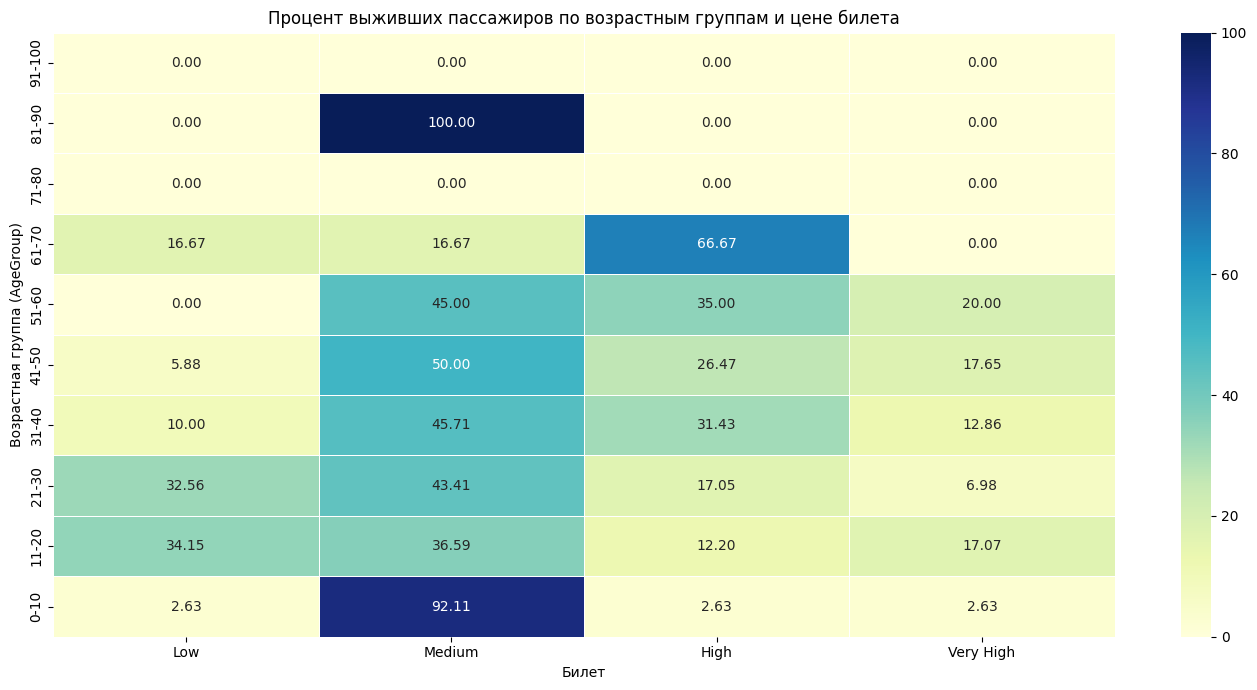

In [510]:
plot_survival_percentage_heatmap(
    data=train_data,
    survival_column='Survived',
    age_column='AgeGroup',
    parent_column='Fare_Category',
    title='Процент выживших пассажиров по возрастным группам и цене билета',
    xlabel='Билет',
    ylabel='Возрастная группа (AgeGroup)'
)


### Age and Sibsp

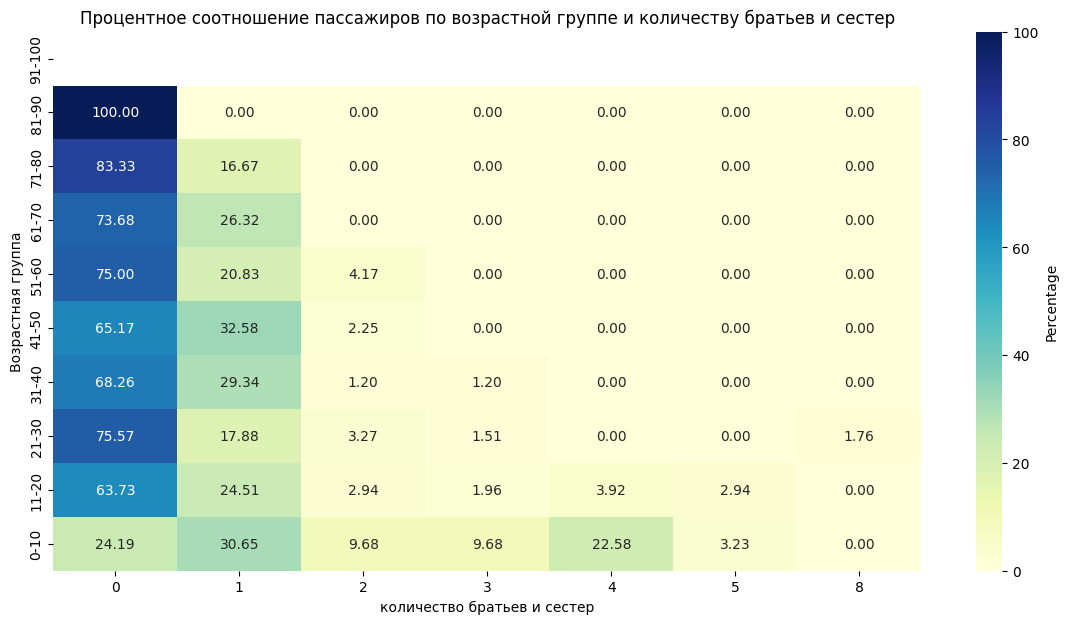

In [511]:
plot_heatmap(train_data, index_column='AgeGroup', columns_column='SibSp', values_column='PassengerId',
             title='Процентное соотношение пассажиров по возрастной группе и количеству братьев и сестер',
             xlabel='количество братьев и сестер', ylabel='Возрастная группа',)

<ipython-input-502-dcd1c8db1072>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = survived_data.groupby([age_column, parent_column]).size().unstack(fill_value=0)


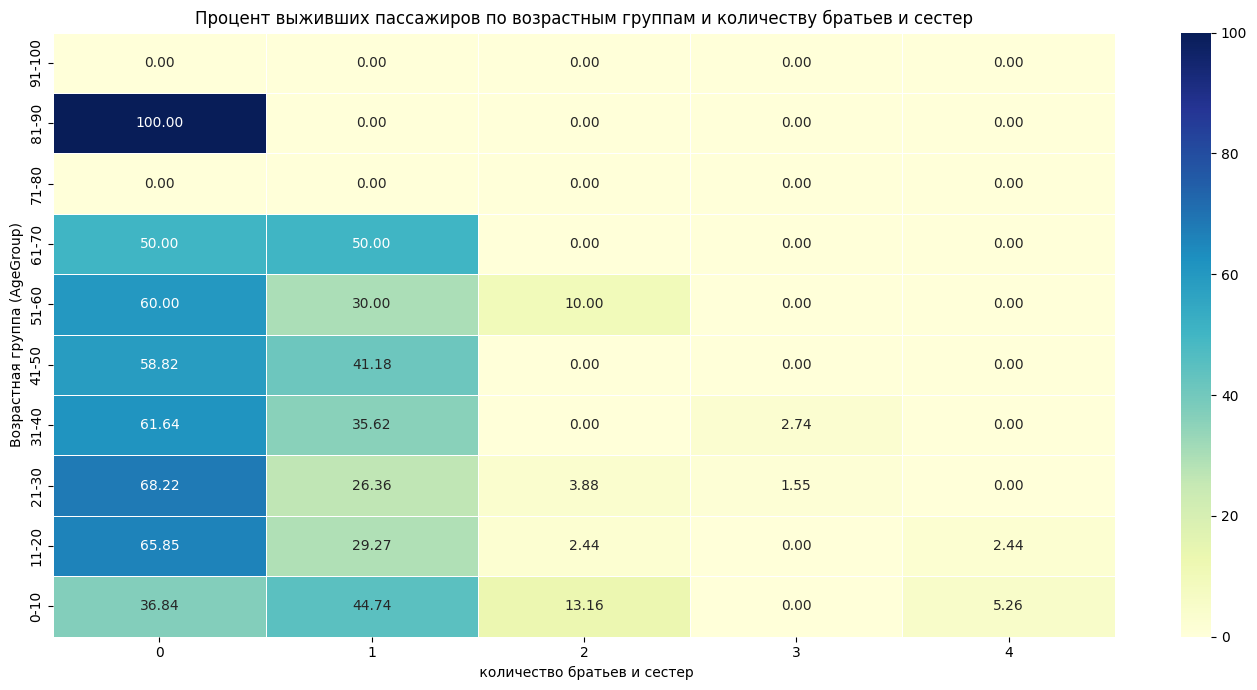

In [512]:
plot_survival_percentage_heatmap(
    data=train_data,
    survival_column='Survived',
    age_column='AgeGroup',
    parent_column='SibSp',
    title='Процент выживших пассажиров по возрастным группам и количеству братьев и сестер',
    xlabel=' количество братьев и сестер',
    ylabel='Возрастная группа (AgeGroup)'
)


## Multifactorial Conclusion

Возрастные группы и выживаемость по классам:

**0-10 лет:**

Классы: Дети в возрасте 0-10 лет чаще выживали в 1-м и 2-м классах. Процент выживших составлял (66%) в 1-м классе и (100%) во 2-м классе.

Родители/Дети: Дети обычно имели 1-2 родителей или опекунов.

Пол: Мальчики выживали с вероятностью (59%), девочки (63%.)

Порты посадки: Наибольший процент выживших был из портов C и S (мальчики: 61%, девочки: 88%).

Классы билетов: Высокий уровень выживаемости наблюдается для билетов категории Low (100%), Medium (60%), High (100%), и Very High (50%).

Братья и сестры: Дети были на бортах чаще с 1 или 2 братьями или сестрами (44%).

**11-20 лет:**

Классы: Пассажиры этой возрастной группы в основном выживали в 1-м классе с вероятностью (83%).

Родители/Дети: Чаще всего были одни.

Пол: Женщины выживали с вероятностью (75%).

Порты посадки: Высокая выживаемость была зафиксирована на портах Q и C (66%).

Классы билетов: Высокий уровень выживаемости для билетов категории High (71%) и Very High (77%).

Братья и сестры: Пассажиры без братьев/сестер на борту выживали с вероятностью (65%.)

**21-30 лет:**

Классы: Пассажиры выживали в 1-м классе с вероятностью (59%).

Родители/Дети: Чаще всего пассажиры были одни.

Пол: Женщины выживали с вероятностью (70%).

Порты посадки: Высокая выживаемость была зафиксирована на портах Q и C, однако вероятность выживания была ниже (50%)

Классы билетов: Very High билеты обеспечивали выживаемость на уровне (60%).

Братья и сестры: Пассажиры без братьев/сестер  на борту выживали с вероятностью (68%.)

**31-40 лет:**

Классы: Пассажиры выживали в 1-м классе с вероятностью (78%).

Родители/Дети: Чаще всего пассажиры были одни.

Пол: Женщины выживали с вероятностью (83%).

Порты посадки: Высокая выживаемость была на портах C и Q, но вероятность выживания была ниже (50%)

Классы билетов: Высокая выживаемость была зафиксирована для билетов категории High (81%) и Very High (90%).

Братья и сестры: Пассажиры без братьев/сестер на борту выживали с вероятностью (61%.)

**41-50 лет:**

Классы: Выживаемость была зафиксирована в 1-м и 2-м классах на уровне (55-59%).

Родители/Дети: Чаще всего пассажиры были одни.

Пол: Женщины выживали с вероятностью (68%.)

Порты посадки: Высокая выживаемость наблюдалась на портах C (64%).

Классы билетов: Высокая выживаемость была зафиксирована для билетов категории High (60%) и Very High (85%).

Братья и сестры: Пассажиры как без братьев/сестер, так и с ними выживали с вероятностью (58% и 41%) соответственно.

**51-60 лет:**

Классы: Пассажиры выживали в 1-м классе с вероятностью (55%.)

Родители/Дети: Чаще всего пассажиры были одни.

Пол: Женщины выживали с вероятностью (88%.)

Порты посадки: Высокая выживаемость была на порту C (53%).

Классы билетов: Very High билеты обеспечивали выживаемость на уровне (66%.)

Братья и сестры: Пассажиры чаще всего были одни (60%).

**61-70 лет:**

Классы: Выживаемость была низкой во всех классах, на уровне (33%.)

Пол: Женщины выживали с вероятностью (100%.)

Порты посадки: Высокая выживаемость была зафиксирована на порту C (66%).

Классы билетов: High билеты обеспечивали выживаемость на уровне (80%.)

Братья и сестры: Пассажиры как одни, так и с братьями/сестрами на борту выживали в равной степени (50 на 50%).

## Final Conclusion


1. Доступ к спасательным средствам

Дети (0-10 лет): Они часто находились под защитой взрослых и могли быстрее попасть в спасательные шлюпки. Высокая выживаемость в 1-м и 2-м (66% и 100%)классах также может быть связана с тем, что дети из более высоких классов имели лучший доступ к спасательным средствам.

Пассажиры старшего возраста (61-70 лет): Выживаемость в этой группе была низкой (33%), что может быть связано с физической неспособностью быстро эвакуироваться или с тем, что спасательные шлюпки были в основном доступны для более молодых пассажиров.

2.Положение на борту

Пассажиры 11-20 лет и 31-40 лет: В эти группы часто входили молодые взрослые, которые могли легче найти путь к спасательным шлюпкам и имели больше шансов на выживание благодаря лучшему социальному статусу, если они путешествовали в 1-м или 2-м классах. Выживаемость в 1-м классе для этих групп составляла 83% и 78% соответственно.

Пассажиры среднего возраста (41-50 лет): Они имели более высокую выживаемость (55-59%) по сравнению с пожилыми людьми, что может быть связано с их физическим состоянием и возможностями быстрее эвакуироваться. Тем не менее, их выживаемость была ниже, чем у детей и молодых людей.

3. Пол и роль в спасении

Женщины и дети: Женщины и дети, особенно в возрасте до 10 лет, были приоритетными при посадке в спасательные шлюпки в соответствии с политикой "женщин и детей вперед". Это объясняет их более высокую выживаемость, где девочки до 10 лет выживали с вероятностью 63%, а женщины 21-30 лет — с вероятностью 70%.

Мужчины: Мужчины, особенно в возрасте 21-30 лет и 31-40 лет, в большинстве случаев имели меньший шанс на выживание, так как они чаще оставались на борту, ожидая эвакуации.

4. Класс билета и условия

Высокий и средний класс (1-й и 2-й): Пассажиры более высоких классов, особенно в возрасте до 10 лет, имели лучшие условия и более быстрый доступ к спасательным шлюпкам, что способствовало их высокой выживаемости (66% в 1-м классе и 100% во 2-м классе).

Низкий класс (3-й): Пассажиры третьего класса часто находились в менее доступных частях корабля, что снижало их шансы на быструю эвакуацию и выживание.

5. Братья и сестры:

Пассажиры, путешествующие с более чем 2 братьями и сестрами, иногда имели меньшую выживаемость, так как они могли задерживаться, чтобы оставаться вместе, что влияло на их шанс попасть в спасательные шлюпки. Например, пассажиры с одним или двумя братьями/сестрами выживали с вероятностью 44%, а пассажиры без братьев/сестер — 65%.

# Future Engeneering

In [513]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch']

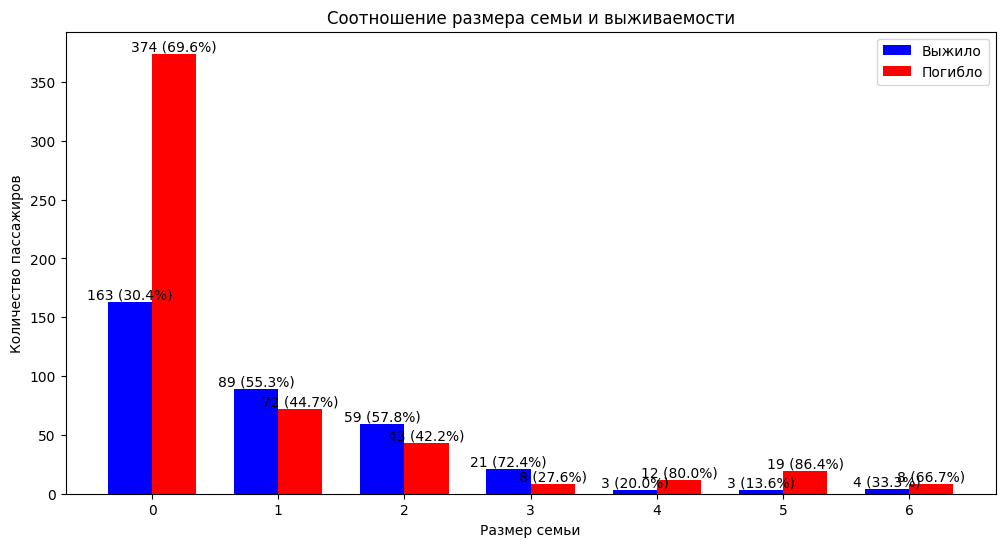

In [514]:
import matplotlib.pyplot as plt
import numpy as np

# Группируем данные по Family_Size и Survived и считаем количество пассажиров
grouped_data = train_data.groupby(['Family_Size', 'Survived']).size().unstack(fill_value=0)

grouped_data = grouped_data[grouped_data.index <= 6]

x = np.arange(len(grouped_data.index))

bar_width = 0.35

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, grouped_data[1], width=bar_width, color='blue', label='Выжило')
bars2 = plt.bar(x + bar_width/2, grouped_data[0], width=bar_width, color='red', label='Погибло')

plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.title('Соотношение размера семьи и выживаемости')
plt.xticks(x, grouped_data.index)

plt.legend()

for i, bar in enumerate(bars1):
    height = bar.get_height()
    total = grouped_data.iloc[i].sum()
    percentage = height / total * 100
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    total = grouped_data.iloc[i].sum()
    percentage = height / total * 100
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

In [515]:
train_data['Embarked'] = train_data['Embarked'].map({'S': 1, 'Q': 2, 'C': 3})

In [516]:
train_data = train_data.drop('Ticket', axis=1)
train_data = train_data.drop('Name', axis=1)
train_data = train_data.drop('AgeGroup', axis=1)
train_data = train_data.drop('Fare_Category', axis=1)

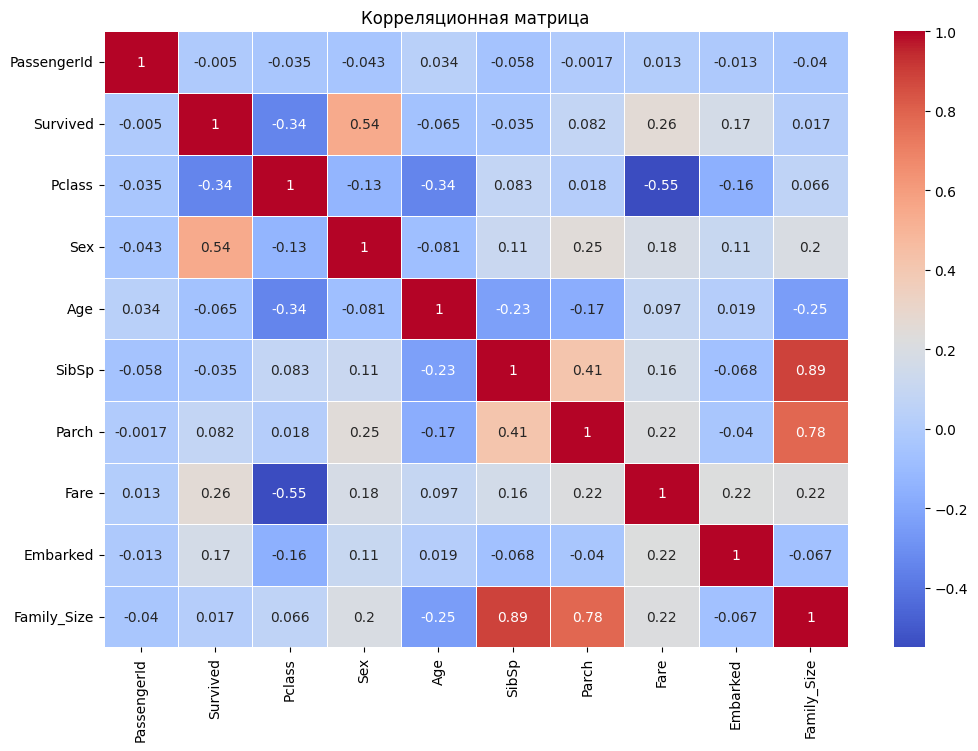

In [517]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [518]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

X = train_data_imputed.drop(columns=['PassengerId', 'Survived'])
y = train_data_imputed['Survived']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_scaled, y)

feature_ranking = pd.Series(fit.ranking_, index=X.columns).sort_values()

print(feature_ranking)


Pclass         1
Sex            1
Age            1
SibSp          1
Embarked       2
Family_Size    3
Fare           4
Parch          5
dtype: int64


In [519]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch']

In [520]:
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)

In [521]:
import pandas as pd

imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

X = train_data_imputed.drop(columns=['PassengerId', 'Survived'])
y = train_data_imputed['Survived']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_scaled, y)

feature_ranking = pd.Series(fit.ranking_, index=X.columns).sort_values()

print(feature_ranking)

Pclass         1
Sex            1
Age            1
Family_Size    2
Embarked       3
Fare           4
dtype: int64


In [522]:
import pandas as pd
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)

       Feature  Coefficient
0       Pclass    -0.887655
1          Sex     1.301657
2          Age    -0.487554
3         Fare     0.110482
4     Embarked     0.173265
5  Family_Size    -0.351455


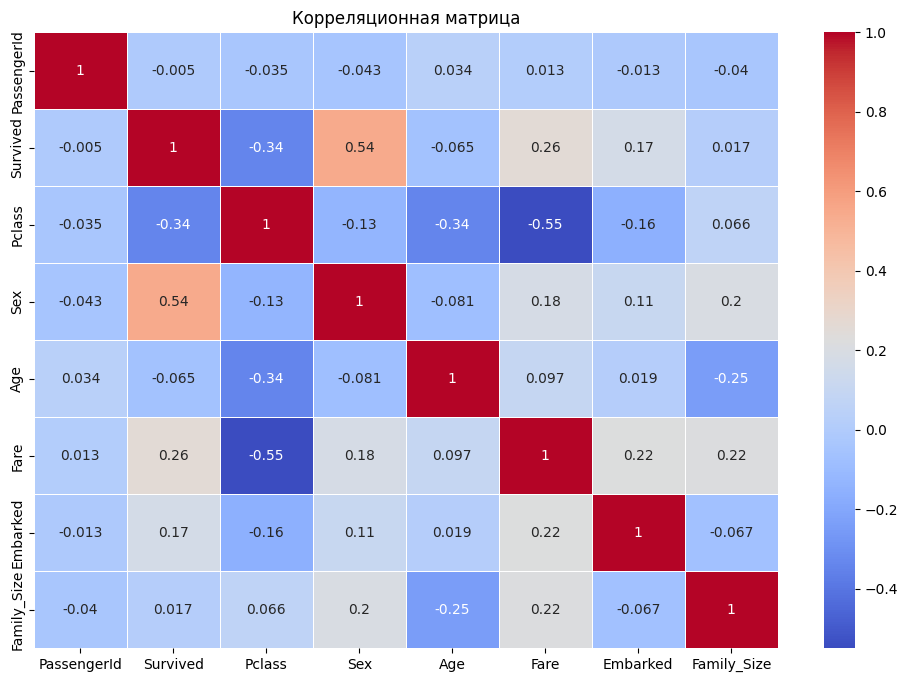

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Logistic regression

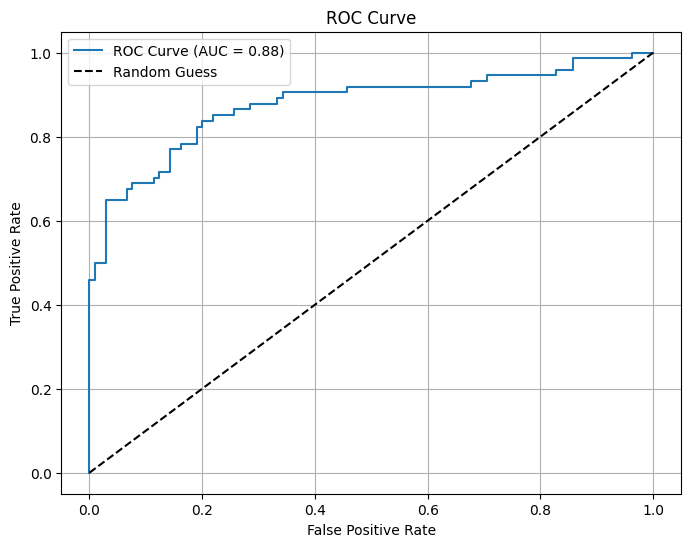

Accuracy: 0.82
Confusion Matrix:
 [[85 20]
 [13 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       105
           1       0.75      0.82      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC AUC Score: 0.88
Cross-validation scores: [0.76966292 0.78651685 0.7752809  0.8079096  0.75141243]
Mean CV Accuracy: 0.78


In [524]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# Подготовка данных
X = train_data[['Pclass', 'Sex', 'Embarked', 'Family_Size', 'Fare', 'Age']]
y = train_data['Survived']

# Масштабирование данных
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Балансировка классов на обучающем наборе
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Настройка гиперпараметров с расширенной сеткой
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")


In [525]:
import pandas as pd

data1 = {
    'Experiment': ['Original', 'Feature set 1', 'Feature set 2', 'Feature set 3', 'Feature set 4', 'Feature set 5'],
    'Features': [
        'Pclass, Sex, Embarked, SibSp, Parch, Fare',
        'Sex, Embarked, Family_size, FarePerClass, Age',
        'Pclass, Sex, Embarked, Family_size, FarePerClass, Age',
        'Pclass, Sex, Embarked, Family_size, Age',
        'Pclass, Sex, Embarked, Family_size, Fare, Age',
        'Pclass, Sex, Embarked, Family_size,'
    ]
}

df1 = pd.DataFrame(data1)

def highlight_row(s):
    return ['background-color: red' if s['Experiment'] == 'Feature set 4' else '' for _ in s]

styled_df1 = df1.style.apply(highlight_row, axis=1)

styled_df1

,Experiment,Features
0,Original,"Pclass, Sex, Embarked, SibSp, Parch, Fare"
1,Feature set 1,"Sex, Embarked, Family_size, FarePerClass, Age"
2,Feature set 2,"Pclass, Sex, Embarked, Family_size, FarePerClass, Age"
3,Feature set 3,"Pclass, Sex, Embarked, Family_size, Age"
4,Feature set 4,"Pclass, Sex, Embarked, Family_size, Fare, Age"
5,Feature set 5,"Pclass, Sex, Embarked, Family_size,"


In [526]:
import pandas as pd

data2 = {
    'Feature Set': ['Original', 'Feature set 1', 'Feature set 2', 'Feature set 3', 'Feature set 4', 'Feature set 5'],
    'Accuracy': [0.77, 0.77, 0.81, 0.81, 0.82, 0.77],
    'Precision': [0.77, 0.76, 0.80, 0.80, 0.81, 0.76],
    'Recall': [0.78, 0.75, 0.81, 0.81, 0.82, 0.77],
    'F1-Score': [0.76, 0.76, 0.81, 0.81, 0.81, 0.76],
    'Support': [179, 179, 179, 179, 179, 179],
    'ROC AUC': [0.86, 0.85, 0.88, 0.88, 0.88, 0.86],
    'CV Accuracy': [0.76, 0.77, 0.77, 0.77, 0.78, 0.76]
}

df2 = pd.DataFrame(data2)

def highlight_row(s):
    return ['background-color: red' if s['Feature Set'] == 'Feature set 4' else '' for _ in s]

styled_df = df2.style.apply(highlight_row, axis=1).format("{:.2f}", subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'CV Accuracy'])

styled_df


,Feature Set,Accuracy,Precision,Recall,F1-Score,Support,ROC AUC,CV Accuracy
0,Original,0.77,0.77,0.78,0.76,179,0.86,0.76
1,Feature set 1,0.77,0.76,0.75,0.76,179,0.85,0.77
2,Feature set 2,0.81,0.80,0.81,0.81,179,0.88,0.77
3,Feature set 3,0.81,0.80,0.81,0.81,179,0.88,0.77
4,Feature set 4,0.82,0.81,0.82,0.81,179,0.88,0.78
5,Feature set 5,0.77,0.76,0.77,0.76,179,0.86,0.76


## Graph

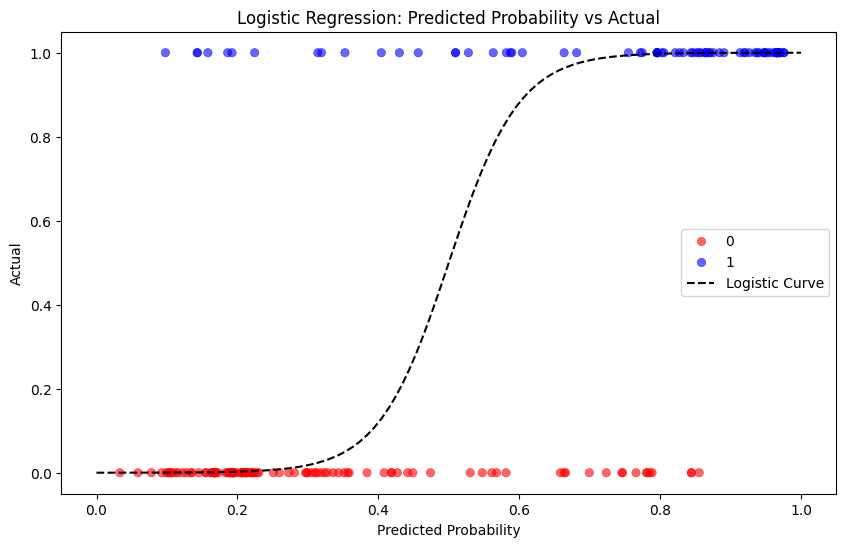

In [527]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

sorted_indices = np.argsort(y_pred_proba)
sorted_pred_proba = y_pred_proba[sorted_indices]
sorted_actual = y_test.iloc[sorted_indices]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sorted_pred_proba, y=sorted_actual, alpha=0.6, edgecolor=None, hue=sorted_actual, palette={0: 'red', 1: 'blue'}, legend='full')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual')
plt.title('Logistic Regression: Predicted Probability vs Actual')

def logistic_curve(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(0, 1, 100)

y_values = logistic_curve((x_values - 0.5) * 20)

plt.plot(x_values, y_values, color='black', linestyle='--', label='Logistic Curve')

plt.legend()
plt.show()


# Case

***Лучший кейс для выживания:***

Возраст: 0-10 лет

Класс: 1-и 2-й класс (66% и 100% выживаемости)

Пол: Девочка или мальчик (63% и 59% выживаемости)

Порт посадки: C или S (88% и 61%)

Класс билета: Low, Medium и High (100%, 60% и 100% выживаемости)

Братья и сестры на борту: 1 братьев и/или сестер (44% выживаемости)

Родители : 1 родитель (60%)

**Этот кейс представляет собой ребенка 0-10 лет в 1 и 2-м классе, садившуюся с порта  C и S, с билетом категории Low, Medium или High и с одним или двумя братьями или сестрами на борту. Выживаемость в этой ситуации наивысшая.**


***Худший кейс для выживания:***

Возраст: 61-70 лет

Класс: Все классы (33% выживаемости)

Пол: Мужчина (13%)

Порт посадки: Порты Q или S (для этой группы 0% и 26%)

Класс билета: Low, Medium, High (33%, 10%, 0% для этой группы)

Братья и сестры на борту: Без братьев и сестер (выживаемость на уровне 50%)

Родители/Дети : 1 человек (15%)

**Этот кейс представляет собой пожилого мужчину, независимо от класса, с отсутствием братьев и сестер на борту. Выживаемость в этом случае наименьшая.**